In [2]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format',lambda x : '%.2f' % x)
pd.set_option('display.max_columns', None)

filename = r'NYU Data Dictionary.xlsx'
inwb = openpyxl.load_workbook(filename)  
ws = inwb['Data Dictionary']

# get variable names
def get_col(start, end):
    res = []
    for i in range(start, end + 1):
        col = ws.cell(i,3).value
        res.append(col.lower())
    return res

# get decode info
def get_decode(filename):
    for decode in ('gbk','utf-8','gb18030'):
        try:    
            data = pd.read_csv(filename, sep = "\n|\|",header = None,
                               encoding=decode, error_bad_lines=False)
            print('data-' +  decode + '-success!!')
            break
        except:
            pass
    return

# Loading customer info data

In [59]:
# loading CUSTOMER INFO 
# [30,0039 rows x 22 columns] 300039 unique, 112390 HNWI

cust_col = get_col(2,23)
cust_data = pd.read_csv('NYU_Cust_Info.txt', sep="|", encoding= 'unicode_escape', header = None,
                       names = cust_col)
print(cust_data['customer_id'].nunique())
print(cust_data.isnull().sum())
cust_data.head()

300039
customer_id                  0
age                      10934
firstcontactday              0
pbk_ind                      0
hib_status              218436
occucode                 12852
occudesc                 15240
gender                   12832
cntry_correspondense       626
intercorpacindicator         0
nationcode                   0
incomelevel              15103
salary                   10934
period_salary            14119
marital_status          114165
number_children          10934
education_level         115138
home_ownership          154703
car_ownership           287480
cust_segment                 0
bussector                22052
busdesc                 137957
dtype: int64


,customer_id,age,firstcontactday,pbk_ind,hib_status,occucode,occudesc,gender,cntry_correspondense,intercorpacindicator,...,salary,period_salary,marital_status,number_children,education_level,home_ownership,car_ownership,cust_segment,bussector,busdesc
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,F,CN,N,...,25000.0,M,2.0,0.0,NaN,NaN,Y,Attrition,00130,OTHERS ...
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,M,CN,N,...,80000.0,M,NaN,0.0,NaN,NaN,NaN,A,00275,RECREATION ...
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,M,CN,N,...,10000.0,M,NaN,0.0,NaN,NaN,NaN,Attrition,NaN,NaN
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,M,CN,N,...,30000.0,M,NaN,0.0,NaN,NaN,NaN,Attrition,00194,OTHER FINANCIAL INDUSTRY ...
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,M,CN,N,...,200000.0,Y,2.0,0.0,4.0,1.0,NaN,D,,NaN


In [136]:
cust_data[cust_data['cust_segment'] == 'A'].isnull().sum()

customer_id                  0
age                       6821
firstcontactday              0
pbk_ind                      0
hib_status               60324
occucode                  8183
occudesc                 10009
gender                    8242
cntry_correspondense         0
intercorpacindicator         0
nationcode                   0
incomelevel               8582
salary                    6821
period_salary             8902
marital_status           71892
number_children           6821
education_level          72672
home_ownership          100779
car_ownership           103473
cust_segment                 0
bussector                 2204
busdesc                  10915
dtype: int64

In [138]:
# replace outliners with Null for age, salary, number_children
# https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/
# https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

for feature in ["age","salary","number_children"]:
    Q1 = cust_data[feature].quantile(0.05)
    Q3 = cust_data[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    print(feature, upper, lower)

age 121.5 -34.5
salary 750000.0 -450000.0
number_children 2.5 -1.5


In [139]:
print(cust_data['age'].describe())
print(cust_data['salary'].describe())
print(cust_data['number_children'].describe())

count    289105.000000
mean         -8.924284
std         625.536749
min       -7982.000000
25%          30.000000
50%          37.000000
75%          48.000000
max        2018.000000
Name: age, dtype: float64
count    2.891050e+05
mean     3.732457e+07
std      1.923578e+09
min      0.000000e+00
25%      1.000000e+04
50%      5.000000e+04
75%      1.500000e+05
max      1.000000e+11
Name: salary, dtype: float64
count    289105.000000
mean          0.133260
std           3.320205
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         511.000000
Name: number_children, dtype: float64


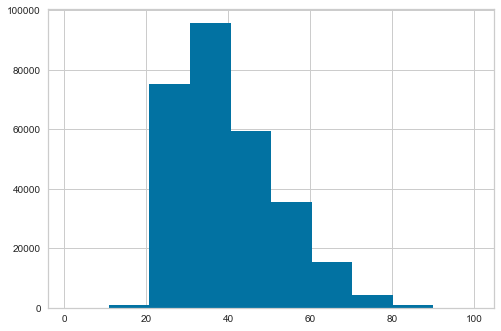

In [140]:
cust_data['age'] = pd.to_numeric(cust_data['age'])
cust_data["age"].mask(cust_data['age'] < 0.0, errors='ignore',inplace=True)
cust_data["age"].mask(cust_data['age'] > 100.0,errors='ignore', inplace=True)
cust_data["age"].hist()

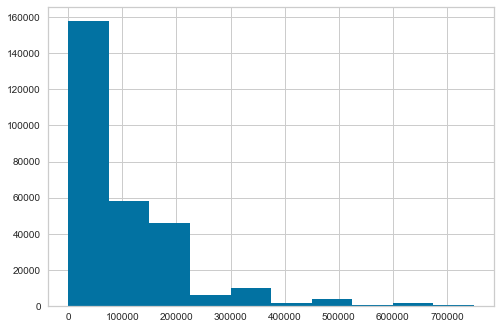

In [141]:
cust_data['salary'] = pd.to_numeric(cust_data['salary'])
cust_data["salary"].mask(cust_data['salary'] < 0.0, errors='ignore',inplace=True)
cust_data["salary"].mask(cust_data['salary'] > 750000.0,errors='ignore', inplace=True)
cust_data["salary"].hist()

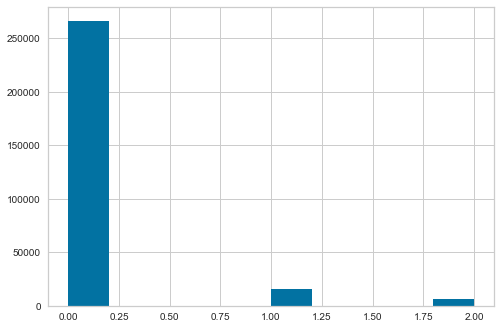

In [142]:
cust_data['number_children'] = pd.to_numeric(cust_data['number_children'])
cust_data["number_children"].mask(cust_data['number_children'] < 0.0, errors='ignore',inplace=True)
cust_data["number_children"].mask(cust_data['number_children'] > 2.5,errors='ignore', inplace=True)
cust_data["number_children"].hist()

In [143]:
print(cust_data['age'].describe())
print(cust_data['salary'].describe())
print(cust_data['number_children'].describe())

count    287301.000000
mean         39.850373
std          12.308877
min           1.000000
25%          30.000000
50%          37.000000
75%          48.000000
max         100.000000
Name: age, dtype: float64
count    285297.000000
mean      88057.319004
std      106202.211982
min           0.000000
25%       10000.000000
50%       50000.000000
75%      130000.000000
max      750000.000000
Name: salary, dtype: float64
count    287843.000000
mean          0.097751
std           0.364642
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: number_children, dtype: float64


# HNWI Portrait: monthly wage 2x, 13y+ older, admin/senior ad/not-working, more balanced male&female ratio, 14%+ married, fewer children, 24%+ advanced degree, 1+ house, 8%+ own car

In [149]:
# convert yearly salary to monthly 

#'x'='M'; average monthly salary-27,997; yearly-169,727;
cust_data.loc[cust_data['period_salary'] == 'Y', 'salary']/= 12

In [33]:
print('Median salary of non-HNWI:',cust_data[cust_data['cust_segment'] != 'A']['salary'].median())
print('Median salary of HNWI:', cust_data[cust_data['cust_segment'] == 'A']['salary'].median())

Median salary of non-HNWI: 10000.0
Median salary of HNWI: 20000.0


In [34]:
print('Non-HWIN Monthly Salary Description:')
print(cust_data[cust_data['cust_segment'] != 'A']['salary'].describe())
print(cust_data[cust_data['cust_segment'] != 'A']['salary'].isin([0]).sum())
print()
print('Monthly Salary Description:')
print(cust_data[cust_data['cust_segment'] == 'A']['salary'].describe())
print(cust_data[cust_data['cust_segment'] == 'A']['salary'].isin([0]).sum())

Non-HWIN Monthly Salary Description:
count    182064.000000
mean      14621.921236
std       20121.705990
min           0.000000
25%        6666.666667
50%       10000.000000
75%       16666.666667
max      750000.000000
Name: salary, dtype: float64
4722

Monthly Salary Description:
count    103233.000000
mean      35404.523939
std       53799.772138
min           0.000000
25%        6500.000000
50%       20000.000000
75%       45000.000000
max      750000.000000
Name: salary, dtype: float64
15244


/Users/estheryao/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/estheryao/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


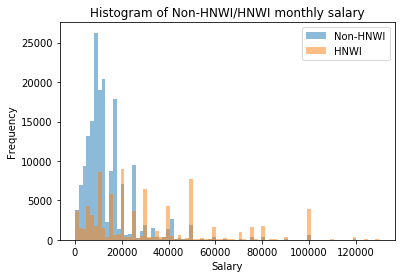

In [35]:
# 15244 HNWI salary = 0, so range starts from 1; 130000 is 75% salary
x = cust_data[cust_data['cust_segment'] != 'A']['salary']
y = cust_data[cust_data['cust_segment'] == 'A']['salary']
# x.hist(bins = 70, range = (0, 130000),  alpha = 0.5, label = 'Non-HNWI', legend = True)
# y.hist(bins = 70, range = (0, 130000), alpha = 0.5, label = 'HNWI', legend = True)
plt.title("Histogram of Non-HNWI/HNWI monthly salary")
plt.hist(x, bins=80, range = (1, 130000), alpha=0.5, label='Non-HNWI')
plt.hist(y, bins=80, range = (1, 130000), alpha=0.5, label='HNWI')
# plt.hist([x,y], bins=30, range=(1, 130000), stacked=True, alpha=0.5, label = ['Non-HNWI', 'HNWI'])
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [36]:
print('Age of non-HNWI:',cust_data[cust_data['cust_segment'] != 'A']['age'].median())
print('Age of HNWI:', cust_data[cust_data['cust_segment'] == 'A']['age'].median())

Age of non-HNWI: 33.0
Age of HNWI: 46.0


/Users/estheryao/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/estheryao/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


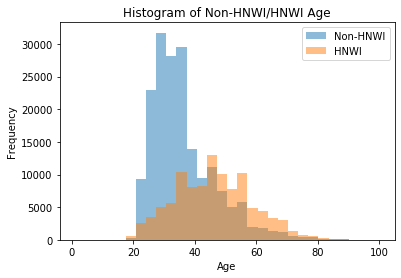

In [119]:
x = cust_data[cust_data['cust_segment'] != 'A']['age']
y = cust_data[cust_data['cust_segment'] == 'A']['age']
# x.hist(bins = 70, range = (0, 130000),  alpha = 0.5, label = 'Non-HNWI', legend = True)
# y.hist(bins = 70, range = (0, 130000), alpha = 0.5, label = 'HNWI', legend = True)
plt.title("Histogram of Non-HNWI/HNWI Age")
plt.hist(x, bins=30, range = (1, 100), alpha=0.5, label='Non-HNWI')
plt.hist(y, bins=30, range = (1, 100), alpha=0.5, label='HNWI')
# plt.hist([x,y], bins=30, range=(1, 130000), stacked=True, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [151]:
def draw_pie(perc, name, title, xlen = 1.5, ylen = 1.5, start = -35):
    fig, ax = plt.subplots(figsize=(4, 5), subplot_kw=dict(aspect="equal"))
    wedges, texts = ax.pie(perc, wedgeprops=dict(width=0.5), startangle=start)
    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.5)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(name[i], xy=(x, y), xytext=(xlen*np.sign(x), ylen*y),
                    horizontalalignment=horizontalalignment, **kw)
    ax.set_title(title)
    plt.show()

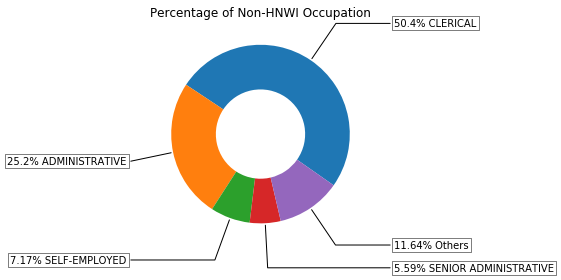

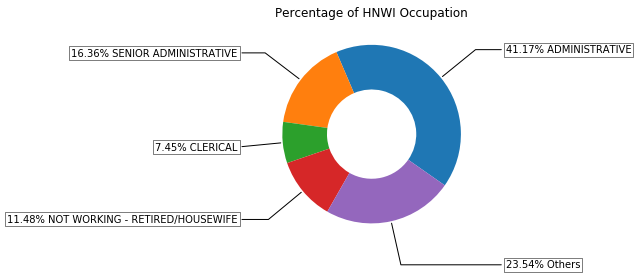

In [152]:
# top non-HNWI occupation: CLERICAL (50.4%), ADMINISTRATIVE/EXECUTIVE (25.2%), 
#                      SELF-EMPLOYED, PROFESSIONAL/SENIOR ADMINISTRATIVE   

occ_a = cust_data[cust_data['cust_segment'] != 'A']['occucode']
# print((occ_a.value_counts()/occ_a.count())*100)

perc_temp = list((occ_a.value_counts()/occ_a.count())*100)
perc_n = perc_temp[:4]+ [sum(perc_temp[4:])]
name_n = ["50.4% CLERICAL",
          "25.2% ADMINISTRATIVE",
          "7.17% SELF-EMPLOYED",
          "5.59% SENIOR ADMINISTRATIVE",
          "11.64% Others"]
title_n = "Percentage of Non-HNWI Occupation"
draw_pie(perc_n, name_n, title_n)    

# top HNWI occupation: ADMINISTRATIVE/EXECUTIVE (41.17%), PROFESSIONAL/SENIOR ADMINISTRATIVE (16.36%),
#                      OTHER, CLERICAL, NOT WORKING - RETIRED, NOT WORKING - HOUSEWIFE, SELF-EMPLOYED

occ_b = cust_data[cust_data['cust_segment'] == 'A']['occucode']
# print((occ_b.value_counts()/occ_b.count())*100) 
# perc_temp_2 = list((occ_b.value_counts()/occ_b.count())*100)
perc = [41.169019,16.355907, 7.451515, 11.48, 23.54]
name = ["41.17% ADMINISTRATIVE",
          "16.36% SENIOR ADMINISTRATIVE",
          "7.45% CLERICAL",
          "11.48% NOT WORKING - RETIRED/HOUSEWIFE",
          "23.54% Others"]
title = "Percentage of HNWI Occupation"
draw_pie(perc, name, title)  

In [93]:
# find the corresponding description of occucode
# cust_data[cust_data['occucode'] == 11]['occudesc']

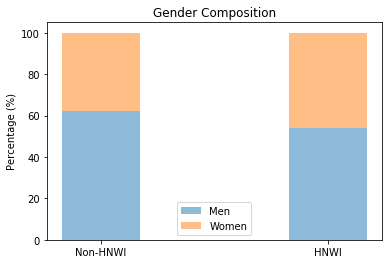

In [113]:
# Non-HNWI: M    114082 (62.32%)    F     68977 (37.68%)
cust_data[cust_data['cust_segment'] != 'A']['gender'].value_counts()

# HNWI: M    56330 (54.09%)     F    47818 (45.91%)  104148
cust_data[cust_data['cust_segment'] == 'A']['gender'].value_counts()

# plot
labels = ['Non-HNWI', 'HNWI']
men = [62.32, 54.09]
women = [37.68, 45.91]

fig, ax = plt.subplots()
width = 0.34
ax.bar(labels, men, width, label='Men', alpha=0.5)
ax.bar(labels, women, width, bottom = men, label='Women', alpha=0.5)
ax.set_ylabel('Percentage (%)')
ax.set_title('Gender Composition')
ax.legend()

plt.show()

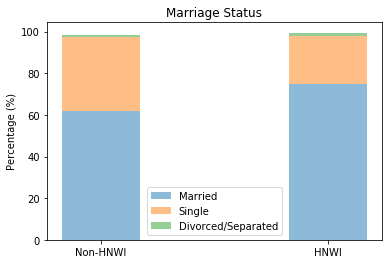

In [122]:
# Non-HNWI: married (61.65%) single (35.91%) divorced/separated (0.74%)
(cust_data[cust_data['cust_segment'] != 'A']['marital_status'].value_counts()/
 cust_data[cust_data['cust_segment'] != 'A']['marital_status'].count())*100 

# HNWI: married (74.91%) single (22.82%) divorced/separated (1.76%)
(cust_data[cust_data['cust_segment'] == 'A']['marital_status'].value_counts()/
 cust_data[cust_data['cust_segment'] == 'A']['marital_status'].count())*100  

# plot
labels = ['Non-HNWI', 'HNWI']
married = np.array([61.65, 74.91])
single = np.array([35.91, 22.82])
divorced = np.array([0.74, 1.76])

fig, ax = plt.subplots()
width = 0.34
ax.bar(labels, married, width, label='Married', alpha=0.5)
ax.bar(labels, single, width, bottom = married, label='Single', alpha=0.5)
ax.bar(labels, divorced, width, bottom = married+single, label='Divorced/Separated', alpha=0.5)
ax.set_ylabel('Percentage (%)')
ax.set_title('Marriage Status')
ax.legend()

plt.show()

Num child of non-HNWI: 0.12921566588778655
Num child of HNWI: 0.04304390021122338
0.0    164320
1.0     13229
2.0      5192
Name: number_children, dtype: int64
0.0    101829
1.0      2022
2.0      1251
Name: number_children, dtype: int64


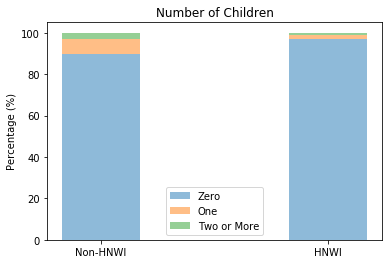

In [140]:
print('Num child of non-HNWI:',cust_data[cust_data['cust_segment'] != 'A']['number_children'].mean())
print('Num child of HNWI:', cust_data[cust_data['cust_segment'] == 'A']['number_children'].mean())

# Non-HNWI: 182741, 89.92%, 7.24%, 2.84%
# HNWI:105102, 96.89%, 1.92%, 1.19%

print(cust_data[cust_data['cust_segment'] != 'A']['number_children'].value_counts())
print(cust_data[cust_data['cust_segment'] == 'A']['number_children'].value_counts())

# plot
labels = ['Non-HNWI', 'HNWI']
zero = np.array([89.92, 96.89])
one = np.array([7.24, 1.92])
two = np.array([2.84, 1.19])

fig, ax = plt.subplots()
width = 0.34
ax.bar(labels, zero, width, label='Zero', alpha=0.5)
ax.bar(labels, one, width, bottom = zero, label='One', alpha=0.5)
ax.bar(labels, two, width, bottom = zero+one, label='Two or More', alpha=0.5)
ax.set_ylabel('Percentage (%)')
ax.set_title('Number of Children')
ax.legend()

plt.show()

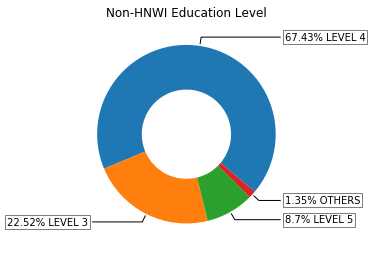

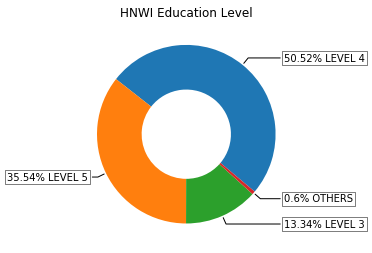

In [158]:
# Non-HNWI: 4 (67.43%) 3 (22.52%) 5 (8.7%)
edu_a = cust_data[cust_data['cust_segment'] != 'A']['education_level']
perc_temp = list((edu_a.value_counts()/edu_a.count())*100)
perc_n = perc_temp[:3]+ [sum(perc_temp[3:])]
name_n = ["67.43% LEVEL 4",
          "22.52% LEVEL 3",
          "8.7% LEVEL 5",
          "1.35% OTHERS"]
title_n = "Non-HNWI Education Level"
draw_pie(perc_n, name_n, title_n, xlen = 1.1, ylen = 1.1, start = -40)   


# HNWI: 4 (50.52%) 5 (35.54%) 3 (13.34%)
edu_b = cust_data[cust_data['cust_segment'] == 'A']['education_level']
perc_temp = list((edu_b.value_counts()/edu_b.count())*100)
perc = perc_temp[:3]+ [sum(perc_temp[3:])]
name = ["50.52% LEVEL 4",
          "35.54% LEVEL 5",
          "13.34% LEVEL 3",
          "0.6% OTHERS"]
title = "HNWI Education Level"
draw_pie(perc, name, title, xlen = 1.1, ylen = 1.1, start = -40)    

In [168]:
cust_data['education_level'].value_counts()

4.0    117961
3.0     37996
5.0     26755
2.0      1727
1.0       436
6.0        26
Name: education_level, dtype: int64

In [142]:
print(cust_data['home_ownership'].describe())
print('Num home of non-HNWI:',cust_data[cust_data['cust_segment'] != 'A']['home_ownership'].median())
print('Num home of HNWI:', cust_data[cust_data['cust_segment'] == 'A']['home_ownership'].median())

count    145336.000000
mean          3.066143
std           1.649964
min           1.000000
25%           1.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: home_ownership, dtype: float64
Num home of non-HNWI: 3.0
Num home of HNWI: 4.0


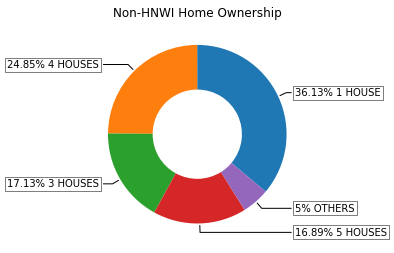

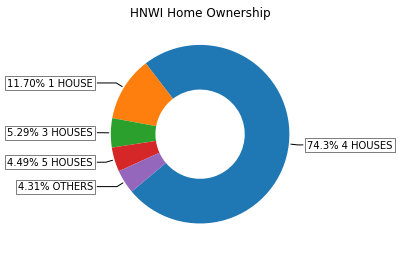

In [170]:
#  Non-HNWI: 1-48313(36.13%);4-33234(24.85%);3-22905(17.13%); 5-22589(16.89%); 6+2-6684 (5%)
home_a = cust_data[cust_data['cust_segment'] != 'A']['home_ownership']
perc_temp = list((home_a.value_counts()/home_a.count())*100)
perc_n = perc_temp[:4]+ [sum(perc_temp[4:])]
name_n = ["36.13% 1 HOUSE",
          "24.85% 4 HOUSES",
          "17.13% 3 HOUSES",
          "16.89% 5 HOUSES",
          "5% OTHERS"]
title_n = "Non-HNWI Home Ownership"
draw_pie(perc_n, name_n, title_n, xlen = 1.1, ylen = 1.1, start = -40) 

#  HNWI: 4-8627(74.3%); 1-13.49 (11.7%); 3-614(5.29%); 5-511(4.4%); 6+2-500(4.31%)
home_b = cust_data[cust_data['cust_segment'] == 'A']['home_ownership']
perc_temp = list((home_b.value_counts()/home_b.count())*100)
perc = perc_temp[:4]+ [sum(perc_temp[4:])]
name = ["74.3% 4 HOUSES",
          "11.70% 1 HOUSE",
          "5.29% 3 HOUSES",
          "4.49% 5 HOUSES",
          "4.31% OTHERS"]
title = "HNWI Home Ownership"
draw_pie(perc, name, title, xlen = 1.2, ylen = 1.1, start = -140) 

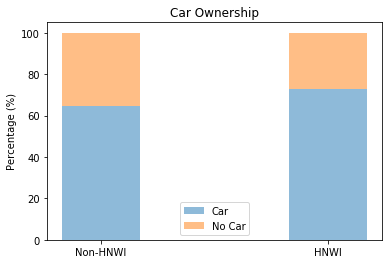

In [114]:
# Non-HNWI: Y (64.52%) N (35.48%)
(cust_data[cust_data['cust_segment'] != 'A']['car_ownership'].value_counts()/
 cust_data[cust_data['cust_segment'] != 'A']['car_ownership'].count())*100  

# HNWI: Y (72.64%) N (27.36%)
(cust_data[cust_data['cust_segment'] == 'A']['car_ownership'].value_counts()/
 cust_data[cust_data['cust_segment'] == 'A']['car_ownership'].count())*100  

# plot
labels = ['Non-HNWI', 'HNWI']
car = [64.52, 72.64]
nocar = [35.48, 27.36]

fig, ax = plt.subplots()
width = 0.34
ax.bar(labels, car, width, label='Car', alpha=0.5)
ax.bar(labels, nocar, width, bottom = car, label='No Car', alpha=0.5)
ax.set_ylabel('Percentage (%)')
ax.set_title('Car Ownership')
ax.legend()

plt.show()

# encode customer data

In [144]:
cust_data['cust_segment'] = cust_data.apply(lambda x: 1 if x.cust_segment =="A" else 0, axis=1)

In [145]:
def func2(x):
    if x == 'M':
        return 1
    elif x == 'F':
        return 0
    else:
        return np.nan
cust_data['gender'] = cust_data.apply(lambda x: func2(x.gender), axis=1)
cust_data.head()

,customer_id,age,firstcontactday,pbk_ind,hib_status,occucode,occudesc,gender,cntry_correspondense,intercorpacindicator,...,salary,period_salary,marital_status,number_children,education_level,home_ownership,car_ownership,cust_segment,bussector,busdesc
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,0.0,CN,N,...,25000.0,M,2.0,0.0,NaN,NaN,Y,0,00130,OTHERS ...
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,N,...,80000.0,M,NaN,0.0,NaN,NaN,NaN,1,00275,RECREATION ...
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,N,...,10000.0,M,NaN,0.0,NaN,NaN,NaN,0,NaN,NaN
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,1.0,CN,N,...,30000.0,M,NaN,0.0,NaN,NaN,NaN,0,00194,OTHER FINANCIAL INDUSTRY ...
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,1.0,CN,N,...,200000.0,Y,2.0,0.0,4.0,1.0,NaN,0,,NaN


In [146]:
def func(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return np.nan
cust_data['car_ownership'] = cust_data.apply(lambda x: func(x.car_ownership), axis=1)

In [147]:
cust_data['intercorpacindicator'] = cust_data.apply(lambda x: func(x.intercorpacindicator.strip()), axis=1)

In [148]:
# (-0.001, 10000.0]       80783
# (130000.0, 750000.0]    69931
# (50000.0, 130000.0]     68556
# (10000.0, 50000.0]      66027

cust_data['salary_bin'] =  pd.qcut(cust_data['salary'], 4, labels = [1,2,3,4])
 
print('value counts:', cust_data['salary_bin'].value_counts())
print('num of null:', cust_data['salary_bin'].isnull().sum())    
cust_data[['salary_bin', 'salary']].head() 

value counts: 1    80783
4    69931
3    68556
2    66027
Name: salary_bin, dtype: int64
num of null: 14742


,salary_bin,salary
0,2,25000.0
1,3,80000.0
2,1,10000.0
3,2,30000.0
4,4,200000.0


In [149]:
cust_data = cust_data.drop(columns=['occudesc', 'period_salary','busdesc', 'salary', 'firstcontactday'])

In [150]:
def func2(x):
    if x == 'M' or x == 'P' or x == 'S':
        return 0
    elif x == 'N':
        return 1
    else:
        return np.nan
cust_data['hib_status'] = cust_data.apply(lambda x: func2(x.hib_status), axis=1)

In [151]:
cust_data['cntry_correspondense'].value_counts()

CN    299413
Name: cntry_correspondense, dtype: int64

In [152]:
# if mainland china, 1; else 0
cust_data['nationcode'] = cust_data.apply(lambda x: 1 if x.nationcode.strip()== 'CN' else 0, axis=1)

In [153]:
# only two type: CN (1)/ NaN (0)
cust_data['cntry_correspondense']= cust_data.apply(lambda x: 1 if x.cntry_correspondense == 'CN' else np.nan, axis=1)

In [154]:
# replace income level == 'A' (#4006) as np.nan
cust_data['incomelevel']= cust_data.apply(lambda x: np.nan if x.incomelevel == 'A' else x.incomelevel, axis=1)

In [155]:
cust_data['marital_status']= cust_data.apply(lambda x: 9 if math.isnan(x.marital_status) else x.marital_status, axis=1)

In [156]:
def func3(x):
    try:
        return int(x)
    except:
        pass
cust_data['bussector']= cust_data.apply(lambda x: func3(x.bussector), axis=1)

In [157]:
cust_data.head()

,customer_id,age,pbk_ind,hib_status,occucode,gender,cntry_correspondense,intercorpacindicator,nationcode,incomelevel,marital_status,number_children,education_level,home_ownership,car_ownership,cust_segment,bussector,salary_bin
0,500999800150176,55.0,0,NaN,9.0,0.0,1.0,0,1,6,2.0,0.0,NaN,NaN,1.0,0,130.0,2
1,500999800895910,38.0,1,1.0,2.0,1.0,1.0,0,1,8,9.0,0.0,NaN,NaN,NaN,1,275.0,3
2,500999800182523,35.0,1,1.0,2.0,1.0,1.0,0,1,5,9.0,0.0,NaN,NaN,NaN,0,NaN,1
3,500999800319932,31.0,0,NaN,16.0,1.0,1.0,0,1,7,9.0,0.0,NaN,NaN,NaN,0,194.0,2
4,500999800818899,30.0,0,NaN,3.0,1.0,1.0,0,1,5,2.0,0.0,4.0,1.0,NaN,0,NaN,4


In [158]:
cust_data.to_csv('cust_data1.csv', index=False)

# Loading credit data

In [185]:
credit_data = pd.read_table('NYU_Credit_Card_Txn.txt',header = None,encoding='GB18030',sep = '|', names = ['Customer_id',
'ARR_ID_CARD',
'MERCHANT',
'XTRANNO',
'TRANS_TYPE',
'TRANS_GROUP',
'TRANS_GROUP_SUB',
'BILL_AMTFLAG',
'BILL_AMT',
'BILL_CURRENCY',
'ORGN_AMT',
'ORGN_CURRENCY',
'CARD_PLAN',
'CARDHOLDER',
'DES_LINE1',
'DES_LINE2',
'MER_CAT_CD',
'MCG',
'MCC_DESC',
'PRODUCT',
'TRAN_EFF_DT',
'PUR_TIME',
'oversea_flag',
'online_flag',
'alipay',
'tenpay',
'applepay'])

In [186]:
credit_data.head()

,Customer_id,ARR_ID_CARD,MERCHANT,XTRANNO,TRANS_TYPE,TRANS_GROUP,TRANS_GROUP_SUB,BILL_AMTFLAG,BILL_AMT,BILL_CURRENCY,...,MCG,MCC_DESC,PRODUCT,TRAN_EFF_DT,PUR_TIME,oversea_flag,online_flag,alipay,tenpay,applepay
0,500999800634562,500000100132150,321290088881002,551422,1050,7.others,7.others,+,418.50,CNY,...,NaN,NaN,3,2018-03-25,0,0,0,0,0,0
1,500999800716097,500000100196733,HSBCZZXD0000001,962440,7054,4.repayment,4.repayment,-,11932.00,CNY,...,NaN,NaN,3,2018-05-06,0,0,0,0,0,0
2,500999801039149,500000100875600,NaN,705915,8950,3.installment,3.1.flexiable installment,-,78500.00,CNY,...,NaN,NaN,3,2018-03-16,193056,0,0,0,0,0
3,500999800890126,500000100561902,321290053110002,664009,1022,1.spending,1.spending,+,27.79,CNY,...,Transportation - Others,LOCAL COMMUTER TRANSPORT,3,2017-10-16,211416,0,0,1,0,0
4,500999801080036,500000100969769,861440349000028,548456,1110,1.spending,1.spending,+,40663.00,CNY,...,Utilities,UTILITIES/ELEC/GAS/H2O/SANI,3,2018-05-21,171233,0,0,0,0,0


In [187]:
credit_data.columns = map(str.lower, credit_data.columns)

In [188]:
credit_data['customer_id'].nunique()

83578

In [6]:
credit_data.isnull().sum()

customer_id              0
arr_id_card              0
merchant            272107
xtranno                  0
trans_type               0
trans_group              1
trans_group_sub          1
bill_amtflag             0
bill_amt                 0
bill_currency            0
orgn_amt                 0
orgn_currency      4385902
card_plan                0
cardholder               0
des_line1                0
des_line2          5231434
mer_cat_cd               0
mcg                1490481
mcc_desc           1490481
product                  0
tran_eff_dt              0
pur_time                 0
oversea_flag             0
online_flag              0
alipay                   0
tenpay                   0
applepay                 0
dtype: int64

In [7]:
# CREDIT TRANC: 34 Merchant categories; 460 Merchant sub-categories
print(credit_data['mcg'].nunique())
print(credit_data['mcc_desc'].nunique())

33
458


In [189]:
spending = credit_data[credit_data['trans_group'] == '1.spending']

In [190]:
spending = spending[spending['bill_amtflag'] == '+']

In [191]:
spending= spending.merge(cust_data[['customer_id','cust_segment']], how = 'left', on = 'customer_id').set_index('customer_id')

In [192]:
spending.head()

,arr_id_card,merchant,xtranno,trans_type,trans_group,trans_group_sub,bill_amtflag,bill_amt,bill_currency,orgn_amt,...,mcc_desc,product,tran_eff_dt,pur_time,oversea_flag,online_flag,alipay,tenpay,applepay,cust_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
500999800890126,500000100561902,321290053110002,664009,1022,1.spending,1.spending,+,27.79,CNY,0.00,...,LOCAL COMMUTER TRANSPORT,3,2017-10-16,211416,0,0,1,0,0,0
500999801080036,500000100969769,861440349000028,548456,1110,1.spending,1.spending,+,40663.00,CNY,40663.00,...,UTILITIES/ELEC/GAS/H2O/SANI,3,2018-05-21,171233,0,0,0,0,0,0
500999800714823,500000100194514,823606070110029,886911,1110,1.spending,1.spending,+,20410.00,CNY,0.00,...,HOTELS/MOTELS/RESORTS,3,2018-01-06,213345,0,0,0,0,0,0
500999801048078,500000100896887,321290053110003,655588,1022,1.spending,1.spending,+,7.54,CNY,7.54,...,MISC GENERAL MERCHANDISE,3,2018-04-25,151154,0,0,0,1,0,0
500999800963139,500000100716865,103449900003211,72872,1110,1.spending,1.spending,+,1161.80,CNY,0.00,...,PETROLEUM/PETROLEUM PRODUCTS,3,2017-12-20,102317,0,0,0,0,0,0


In [193]:
by_mcg = pd.pivot_table(spending,index = ['customer_id'], columns = ['mcg'], values = ['bill_amt'], aggfunc = [np.sum,len],
               dropna = False, fill_value = 0)

In [194]:
mcg_m = by_mcg['sum']['bill_amt']
mcg_f = by_mcg['len']['bill_amt']

In [195]:
by_mcg.head()

sum                                                      \
                bill_amt                                                       
mcg             Airlines Auto Rental Auto Services Book Store and Stationery   
customer_id                                                                    
500999800018780      0.0      210.61        183.94                      0.00   
500999800049891      0.0        0.00      13670.93                      0.00   
500999800069356      0.0        0.00          0.00                      0.00   
500999800069458   7661.6        0.00          0.00                     58.69   
500999800069727   3862.2     1591.67          0.00                    931.58   

                                                                               \
                                                                                
mcg             Building and Renovation Business Services Commercial Services   
customer_id                                                                     
500999800018780                  204.10            719.06                 0.0   
500999800049891               112431.12              0.00                 0.0   
500999800069356                    0.00              0.00                 0.0   
500999800069458                    0.00              0.00                 0.0   
500999800069727                 3692.64           4017.77                 0.0   

                                                              ...         len  \
                                                              ...    bill_amt   
mcg             Department Stores Duty Free Stores Education  ... Restaurants   
customer_id                                                   ...               
500999800018780         243879.34              0.0       0.0  ...          18   
500999800049891           3837.08              0.0       0.0  ...          32   
500999800069356              0.00              0.0       0.0  ...           2   
500999800069458            781.86              0.0       0.0  ...           1   
500999800069727            386.28              0.0    4898.4  ...         104   

                                                                            \
                                                                             
mcg             Retail - Fashion Retail - Household Retail - NEC Road Toll   
customer_id                                                                  
500999800018780                2                  2            3         0   
500999800049891               16                 11            0         0   
500999800069356                1                  0            0         0   
500999800069458                0                  0            0         0   
500999800069727               47                 14            9         0   

                                                                       \
                                                                        
mcg             Telecom Transportation - Others Transportation - Rail   
customer_id                                                             
500999800018780       1                       0                     0   
500999800049891      11                       1                     0   
500999800069356       0                       0                     0   
500999800069458       0                       0                     0   
500999800069727      15                      93                    49   

                                         
                                         
mcg             Travel Agents Utilities  
customer_id                              
500999800018780             0         0  
500999800049891             0         0  
500999800069356             0         0  
500999800069458             0         0  
500999800069727             1        27  

[5 rows x 66 columns]

In [335]:
mcg_cat = credit_data[["customer_id","mcc_desc", "bill_amt"]]
hnwi = cust_data[["customer_id", "cust_segment"]]
hnwi['cust_segment']= hnwi.apply(lambda x: 1 if x.cust_segment == 'A' else 0, axis=1)
hnwi['cust_segment'].value_counts()
# hnwi_cat = spending.merge(cust_data, how = 'left', on = 'customer_id').set_index('customer_id')

/Users/estheryao/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    187649
1    112390
Name: cust_segment, dtype: int64

In [336]:
by_cat= mcg_cat.merge(hnwi, how = 'left', on = 'customer_id').set_index('customer_id')
by_cat

,mcc_desc,bill_amt,cust_segment
customer_id,,,
500999800634562,NaN,418.50,0
500999800716097,NaN,11932.00,0
500999801039149,NaN,78500.00,0
500999800890126,LOCAL COMMUTER TRANSPORT,27.79,0
500999801080036,UTILITIES/ELEC/GAS/H2O/SANI,40663.00,0
...,...,...,...
500999801109919,HOSPITALS,2834.79,0
500999801109919,LUMBER/BUILD. SUPPLY STORES,8063.52,0
500999801109919,HOSPITALS,168.30,0


In [337]:
temp1 = by_cat[by_cat['cust_segment'] == 0]
temp1["customer_id1"] = temp1.index
print('unique non-hnwi:', temp1['customer_id1'].nunique())
temp2 = by_cat[by_cat['cust_segment'] == 1]
temp2["customer_id1"] = temp2.index
print('unique hnwi:', temp2['customer_id1'].nunique())

unique non-hnwi: 79860
unique hnwi: 3718


/Users/estheryao/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/estheryao/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [339]:
pd1 = pd.pivot_table(by_cat,index = ['cust_segment'], columns = ['mcc_desc'], values = ['bill_amt'], aggfunc = [np.sum],
               dropna = False, fill_value = 0)
pd1

sum                       \
                                bill_amt                        
mcc_desc     ACCOUNTANTS/AUDITORS/BOOKPR ADVANTAGE RENT-A-CAR   
cust_segment                                                    
0                             4734151.57              2743.39   
1                              107641.30              3768.76   

                                                                    \
                                                                     
mcc_desc     ADVERTISING SERVICES AER LINGUS AERO ARGENT  AEROFLOT   
cust_segment                                                         
0                     34881005.15     309.79         0.0    254.68   
1                      1857423.75       0.00      5444.8  79921.82   

                                                                          \
                                                                           
mcc_desc     AFFILIATED AUTO RENTAL AGRICULTURAL CO-OPERATIVE AIR CANADA   
cust_segment                                                               
0                            557.76                  28608.35  165761.68   
1                           6056.18                      0.00  133080.61   

                        ...                                                  \
                        ...                                                   
mcc_desc     AIR CHINA  ... WELDING SERVICES WESTIN HOTELS WESTJET AIRLINES   
cust_segment            ...                                                   
0              3579.64  ...        139061.65      15824.61           424.33   
1             14597.37  ...           637.42      45026.95           846.19   

                                                                              \
                                                                               
mcc_desc     WHOLESALE CLUBS WIG AND TOUPEE STORES WIRE TRANSFER MONEY ORDER   
cust_segment                                                                   
0                  309480.69             357342.12               24380241.65   
1                  156439.24               8739.09                2629547.98   

                                                                           \
                                                                            
mcc_desc     WOMENS ACCESS/SPECIALTY WOMENS READY TO WEAR STORES  WYNDHAM   
cust_segment                                                                
0                        13030324.16                 67676360.37  3951.37   
1                          926935.80                  6282905.42  2728.23   

                             
                             
mcc_desc     WYNN LAS VEGAS  
cust_segment                 
0                    779.97  
1                   4265.56  

[2 rows x 458 columns]

In [340]:
pd2 = pd1.transpose()
# per person
pd2[0] = pd2[0].div(79860)
pd2[1] = pd2[1].div(3718)
pd2

cust_segment                                       0            1
             mcc_desc                                            
sum bill_amt ACCOUNTANTS/AUDITORS/BOOKPR   59.280636    28.951399
             ADVANTAGE RENT-A-CAR           0.034352     1.013653
             ADVERTISING SERVICES         436.776924   499.576049
             AER LINGUS                     0.003879     0.000000
             AERO ARGENT                    0.000000     1.464443
...                                              ...          ...
             WIRE TRANSFER MONEY ORDER    305.287273   707.247977
             WOMENS ACCESS/SPECIALTY      163.164590   249.310328
             WOMENS READY TO WEAR STORES  847.437520  1689.861598
             WYNDHAM                        0.049479     0.733790
             WYNN LAS VEGAS                 0.009767     1.147273

[458 rows x 2 columns]

In [341]:
pd2.sort_values(by=[0], ascending=False).head(10)

cust_segment                                            0             1
             mcc_desc                                                  
sum bill_amt GROCERY STORES/SUPERMARKETS     27020.620127  25913.244231
             RESTAURANTS                     12035.994380  16584.205215
             HOTELS/MOTELS/RESORTS           11568.800768  18034.264664
             DEPARTMENT STORES               10457.420338  15016.624820
             PRECIOUS STONES/METALS/JEWELRY   9854.218668   6692.885586
             UTILITIES/ELEC/GAS/H2O/SANI      6864.619463   5951.910742
             MISC GENERAL MERCHANDISE         6818.917255  12899.524887
             SERVICE STATIONS                 4838.504365   3977.855309
             HEALTH & BEAUTY SPAS             4710.742402   5202.550955
             AIRLINES, AIR CARRIERS           4445.266873  11222.272983

In [342]:
pd2.sort_values(by=[1], ascending=False).head(10)
# difference: 0--service stations; 1--travel agency (not in 0)

cust_segment                                            0             1
             mcc_desc                                                  
sum bill_amt GROCERY STORES/SUPERMARKETS     27020.620127  25913.244231
             HOTELS/MOTELS/RESORTS           11568.800768  18034.264664
             RESTAURANTS                     12035.994380  16584.205215
             DEPARTMENT STORES               10457.420338  15016.624820
             MISC GENERAL MERCHANDISE         6818.917255  12899.524887
             AIRLINES, AIR CARRIERS           4445.266873  11222.272983
             PRECIOUS STONES/METALS/JEWELRY   9854.218668   6692.885586
             TRAVEL AGENCIES                  3407.046514   6499.998682
             UTILITIES/ELEC/GAS/H2O/SANI      6864.619463   5951.910742
             HEALTH & BEAUTY SPAS             4710.742402   5202.550955

In [343]:
pd3 = pd.pivot_table(by_cat,index = ['cust_segment'], columns = ['mcc_desc'], values = ['bill_amt'], aggfunc = [len],
               dropna = False, fill_value = 0)
pd4 = pd3.transpose()
pd4[0] = pd4[0].div(79860)
pd4[1] = pd4[1].div(3718)
pd4

cust_segment                                     0         1
             mcc_desc                                       
len bill_amt ACCOUNTANTS/AUDITORS/BOOKPR  0.004220  0.003765
             ADVANTAGE RENT-A-CAR         0.000063  0.001614
             ADVERTISING SERVICES         0.035487  0.048413
             AER LINGUS                   0.000013  0.000000
             AERO ARGENT                  0.000000  0.002690
...                                            ...       ...
             WIRE TRANSFER MONEY ORDER    0.340959  0.576654
             WOMENS ACCESS/SPECIALTY      0.047708  0.096019
             WOMENS READY TO WEAR STORES  0.408402  0.688004
             WYNDHAM                      0.000050  0.001614
             WYNN LAS VEGAS               0.000025  0.000538

[458 rows x 2 columns]

In [344]:
pd4.sort_values(by=[0], ascending=False).head(10)

cust_segment                                     0          1
             mcc_desc                                        
len bill_amt MISC GENERAL MERCHANDISE     7.460331  12.806347
             RESTAURANTS                  6.969672  15.290210
             GROCERY STORES/SUPERMARKETS  4.250063   7.524744
             LOCAL COMMUTER TRANSPORT     2.694140   4.091985
             HOTELS/MOTELS/RESORTS        1.845530   3.214900
             DEPARTMENT STORES            1.844879   3.260355
             FINANCIAL INST/MANUAL CASH   1.570724   2.891339
             MISC FOOD STORES - DEFAULT   1.287516   2.626681
             FAST FOOD RESTAURANTS        0.894052   2.669715
             TELECOMMUNICATION SERVICES   0.856824   1.322485

In [345]:
pd4.sort_values(by=[1], ascending=False).head(10)
# differnce: 0--telecom service; 1--Taxicabs/limousines

cust_segment                                     0          1
             mcc_desc                                        
len bill_amt RESTAURANTS                  6.969672  15.290210
             MISC GENERAL MERCHANDISE     7.460331  12.806347
             GROCERY STORES/SUPERMARKETS  4.250063   7.524744
             LOCAL COMMUTER TRANSPORT     2.694140   4.091985
             DEPARTMENT STORES            1.844879   3.260355
             HOTELS/MOTELS/RESORTS        1.845530   3.214900
             TAXICABS/LIMOUSINES          0.749725   3.150619
             FINANCIAL INST/MANUAL CASH   1.570724   2.891339
             FAST FOOD RESTAURANTS        0.894052   2.669715
             MISC FOOD STORES - DEFAULT   1.287516   2.626681

In [319]:
table = pd.pivot_table(by_cat,index = ['cust_segment'], columns = ['mcc_desc'], values = ['bill_amt'], aggfunc = [np.sum],
               dropna = False, fill_value = 0)
table = table.transpose()
table

cust_segment                                        0           1
             mcc_desc                                            
sum bill_amt ACCOUNTANTS/AUDITORS/BOOKPR   4734151.57   107641.30
             ADVANTAGE RENT-A-CAR             2743.39     3768.76
             ADVERTISING SERVICES         34881005.15  1857423.75
             AER LINGUS                        309.79        0.00
             AERO ARGENT                         0.00     5444.80
...                                               ...         ...
             WIRE TRANSFER MONEY ORDER    24380241.65  2629547.98
             WOMENS ACCESS/SPECIALTY      13030324.16   926935.80
             WOMENS READY TO WEAR STORES  67676360.37  6282905.42
             WYNDHAM                          3951.37     2728.23
             WYNN LAS VEGAS                    779.97     4265.56

[458 rows x 2 columns]

In [320]:
table['% of HNWI'] = (table[1]/(table[1]+table[0]))*100
table['abs% of HNWI'] = abs(table['% of HNWI'] - 50)
table

cust_segment                                        0           1   % of HNWI  \
             mcc_desc                                                           
sum bill_amt ACCOUNTANTS/AUDITORS/BOOKPR   4734151.57   107641.30    2.223170   
             ADVANTAGE RENT-A-CAR             2743.39     3768.76   57.872746   
             ADVERTISING SERVICES         34881005.15  1857423.75    5.055806   
             AER LINGUS                        309.79        0.00    0.000000   
             AERO ARGENT                         0.00     5444.80  100.000000   
...                                               ...         ...         ...   
             WIRE TRANSFER MONEY ORDER    24380241.65  2629547.98    9.735537   
             WOMENS ACCESS/SPECIALTY      13030324.16   926935.80    6.641245   
             WOMENS READY TO WEAR STORES  67676360.37  6282905.42    8.495089   
             WYNDHAM                          3951.37     2728.23   40.844212   
             WYNN LAS VEGAS                    779.97     4265.56   84.541366   

cust_segment                              abs% of HNWI  
             mcc_desc                                   
sum bill_amt ACCOUNTANTS/AUDITORS/BOOKPR     47.776830  
             ADVANTAGE RENT-A-CAR             7.872746  
             ADVERTISING SERVICES            44.944194  
             AER LINGUS                      50.000000  
             AERO ARGENT                     50.000000  
...                                                ...  
             WIRE TRANSFER MONEY ORDER       40.264463  
             WOMENS ACCESS/SPECIALTY         43.358755  
             WOMENS READY TO WEAR STORES     41.504911  
             WYNDHAM                          9.155788  
             WYNN LAS VEGAS                  34.541366  

[458 rows x 4 columns]

In [309]:
spending_copy = spending.copy()
spending_copy['customer_id1'] = spending_copy.index
uni = spending_copy.groupby('mcc_desc')['customer_id1'].agg('nunique')
uni

mcc_desc
ACCOUNTANTS/AUDITORS/BOOKPR      277
ADVANTAGE RENT-A-CAR               8
ADVERTISING SERVICES            2169
AER LINGUS                         1
AERO ARGENT                        1
                               ...  
WIRE TRANSFER MONEY ORDER       8361
WOMENS ACCESS/SPECIALTY         2573
WOMENS READY TO WEAR STORES    11153
WYNDHAM                            8
WYNN LAS VEGAS                     4
Name: customer_id1, Length: 458, dtype: int64

In [321]:
new_= table.merge(uni, how = 'left', on = 'mcc_desc')
new_

,0,1,% of HNWI,abs% of HNWI,customer_id1
mcc_desc,,,,,
ACCOUNTANTS/AUDITORS/BOOKPR,4734151.57,107641.30,2.223170,47.776830,277
ADVANTAGE RENT-A-CAR,2743.39,3768.76,57.872746,7.872746,8
ADVERTISING SERVICES,34881005.15,1857423.75,5.055806,44.944194,2169
AER LINGUS,309.79,0.00,0.000000,50.000000,1
AERO ARGENT,0.00,5444.80,100.000000,50.000000,1
...,...,...,...,...,...
WIRE TRANSFER MONEY ORDER,24380241.65,2629547.98,9.735537,40.264463,8361
WOMENS ACCESS/SPECIALTY,13030324.16,926935.80,6.641245,43.358755,2573
WOMENS READY TO WEAR STORES,67676360.37,6282905.42,8.495089,41.504911,11153


In [326]:
res_ = new_[new_['customer_id1'] >= 100] 
res_

,0,1,% of HNWI,abs% of HNWI,customer_id1
mcc_desc,,,,,
ACCOUNTANTS/AUDITORS/BOOKPR,4.734152e+06,107641.30,2.223170,47.776830,277
ADVERTISING SERVICES,3.488101e+07,1857423.75,5.055806,44.944194,2169
"AIRLINES, AIR CARRIERS",3.549990e+08,41724410.95,10.517254,39.482746,12311
AIRPORTS/FIELDS/TERMINALS,4.288466e+06,74813.08,1.714607,48.285393,281
AMUSEMENT PARKS/CIRCUS,4.095799e+06,453411.80,9.966823,40.033177,1071
...,...,...,...,...,...
WHOLESALE CLUBS,3.094807e+05,156439.24,33.576422,16.423578,109
WIG AND TOUPEE STORES,3.573421e+05,8739.09,2.387200,47.612800,123
WIRE TRANSFER MONEY ORDER,2.438024e+07,2629547.98,9.735537,40.264463,8361


In [327]:
sorted_res = res_.sort_values(["abs% of HNWI"], ascending=False).head(50)
sorted_res

,0,1,% of HNWI,abs% of HNWI,customer_id1
mcc_desc,,,,,
FURNITURE REUPHOLSTERY/REPAIR,2.166340e+06,405.66,0.018722,49.981278,123
RADIO/TV/STEREO REPAIR SHOP,1.827212e+06,4060.24,0.221717,49.778283,208
QUICK COPY/REPRO SERVICES,3.064299e+06,11872.06,0.385936,49.614064,528
METAL SERVICE CENTERS,5.162849e+06,47228.74,0.906488,49.093512,248
EMPLOYMENT/TEMP HELP AGEN,3.931671e+06,59078.91,1.480396,48.519604,323
NEWS DEALERS/NEWSSTANDS,3.100558e+06,47790.45,1.517953,48.482047,488
ANTIQUE REPRODUCTION STORES,7.895736e+06,128719.21,1.604087,48.395913,483
AIRPORTS/FIELDS/TERMINALS,4.288466e+06,74813.08,1.714607,48.285393,281
ARCHITECTURAL/ENG/SURVEY,2.250440e+07,401513.12,1.752880,48.247120,1123


In [11]:
mean_mcg_1 = pd.pivot_table(spending,index = ['customer_id'], columns = ['mcg'], values = ['bill_amt'], aggfunc = [np.sum, len, np.median,np.mean, np.max, np.min],
               dropna = False, fill_value = 0)

In [12]:
mean_mcg_1

sum                                                      \
                bill_amt                                                       
mcg             Airlines Auto Rental Auto Services Book Store and Stationery   
customer_id                                                                    
500999800018780      0.0      210.61        183.94                      0.00   
500999800049891      0.0        0.00      13670.93                      0.00   
500999800069356      0.0        0.00          0.00                      0.00   
500999800069458   7661.6        0.00          0.00                     58.69   
500999800069727   3862.2     1591.67          0.00                    931.58   
...                  ...         ...           ...                       ...   
500999801139231      0.0        0.00          0.00                      0.00   
500999801139390      0.0        0.00          0.00                      0.00   
500999801139425      0.0        0.00          0.00                      0.00   
500999801139464      0.0        0.00          0.00                      0.00   
500999801140586      0.0        0.00          0.00                      0.00   

                                                                               \
                                                                                
mcg             Building and Renovation Business Services Commercial Services   
customer_id                                                                     
500999800018780                  204.10            719.06                 0.0   
500999800049891               112431.12              0.00                 0.0   
500999800069356                    0.00              0.00                 0.0   
500999800069458                    0.00              0.00                 0.0   
500999800069727                 3692.64           4017.77                 0.0   
...                                 ...               ...                 ...   
500999801139231                    0.00              0.00                 0.0   
500999801139390                    0.00              0.00                 0.0   
500999801139425                    0.00              0.00                 0.0   
500999801139464                    0.00              0.00                 0.0   
500999801140586                    0.00              0.00                 0.0   

                                                              ...        amin  \
                                                              ...    bill_amt   
mcg             Department Stores Duty Free Stores Education  ... Restaurants   
customer_id                                                   ...               
500999800018780         243879.34              0.0       0.0  ...       17.02   
500999800049891           3837.08              0.0       0.0  ...      133.45   
500999800069356              0.00              0.0       0.0  ...      188.40   
500999800069458            781.86              0.0       0.0  ...      985.96   
500999800069727            386.28              0.0    4898.4  ...        8.60   
...                           ...              ...       ...  ...         ...   
500999801139231           5446.33              0.0       0.0  ...        0.00   
500999801139390              0.00              0.0       0.0  ...        0.00   
500999801139425              0.00              0.0       0.0  ...        0.00   
500999801139464              0.00              0.0       0.0  ...    30929.00   
500999801140586              0.00              0.0       0.0  ...        0.00   

                                                                            \
                                                                             
mcg             Retail - Fashion Retail - Household Retail - NEC Road Toll   
customer_id                                                                  
500999800018780           634.28             351.68        40.91       0.0  

In [23]:
spending['bill_currency'].value_counts()

CNY    4429330
USD      74993
Name: bill_currency, dtype: int64

In [19]:
print('500999800634562|500000100132150|321290088881002|551422|1050|7.others|7.others|+|418.50|CNY|0.00|null|C|1|交易分期每期本金摊销|第3期共18期|0|null|null|3|2018-03-25|0|0|0|0|0|0')

500999800634562|500000100132150|321290088881002|551422|1050|7.others|7.others|+|418.50|CNY|0.00|null|C|1|交易分期每期本金摊销|第3期共18期|0|null|null|3|2018-03-25|0|0|0|0|0|0


# Merge datasets

In [263]:
left = pd.read_csv('cust_data1.csv')
right2 = pd.read_csv('spending_subcat_500.csv')
right = pd.read_csv('m_f_median_payment.csv')

In [264]:
right.columns = map(str.lower, right.columns)
right2.columns = map(str.lower, right2.columns)

In [265]:
res_temp = right.merge(left, how = 'left', on = 'customer_id').set_index('customer_id')
# res = left.merge(right, how = 'left', on = 'customer_id').set_index('customer_id')
res_temp = res_temp.merge(right2, how = 'left', on = 'customer_id').set_index('customer_id')
# res.head()

In [266]:
res_temp.shape

(81637, 148)

In [3]:
res = pd.read_csv('merge_data_80000_1.csv')

In [4]:
res.describe()

,airlines_m,auto_rental_m,auto_services_m,book_store_and_stationery_m,building_and_renovation_m,business_services_m,commercial_services_m,department_stores_m,duty_free_stores_m,education_m,financial_services_m,gasoline_m,govt_pymts_m,hotels_m,hyper/supermarket_m,insurance_m,medical_m,others_m,personal_care_m,public_services_m,real_estate_and_finance_m,recreation_m,recurring_m,restaurants_m,retail_-_fashion_m,retail_-_household_m,retail_-_nec_m,road_toll_m,telecom_m,transportation_-_others_m,transportation_-_rail_m,travel_agents_m,utilities_m,airlines_f,auto_rental_f,auto_services_f,book_store_and_stationery_f,building_and_renovation_f,business_services_f,commercial_services_f,department_stores_f,duty_free_stores_f,education_f,financial_services_f,gasoline_f,govt_pymts_f,hotels_f,hyper/supermarket_f,insurance_f,medical_f,others_f,personal_care_f,public_services_f,real_estate_and_finance_f,recreation_f,recurring_f,restaurants_f,retail_-_fashion_f,retail_-_household_f,retail_-_nec_f,road_toll_f,telecom_f,transportation_-_others_f,transportation_-_rail_f,travel_agents_f,utilities_f,airlines_median,auto_rental_median,auto_services_median,book_store_and_stationery_median,building_and_renovation_median,business_services_median,commercial_services_median,department_stores_median,duty_free_stores_median,education_median,financial_services_median,gasoline_median,govt_pymts_median,hotels_median,hyper/supermarket_median,insurance_median,medical_median,others_median,personal_care_median,public_services_median,real_estate_and_finance_median,recreation_median,recurring_median,restaurants_median,retail_-_fashion_median,retail_-_household_median,retail_-_nec_median,road_toll_median,telecom_median,transportation_-_others_median,transportation_-_rail_median,travel_agents_median,utilities_median,oversea_flag,online_flag,alipay,tenpay,applepay,total_purchase_num,total_amt,age,pbk_ind,hib_status,occucode,gender,cntry_correspondense,intercorpacindicator,nationcode,incomelevel,marital_status,number_children,education_level,home_ownership,car_ownership,cust_segment,bussector,salary_bin,duty_free_stores,taxicabs/limousines,professional_services_-_def,book_stores,financial_inst/manual_cash,"airlines,_air_carriers",passenger_railways,films/video_production/dist,wire_transfer_money_order,mens/womens_clothing_stores,misc_personal_serv_-_def,womens_ready_to_wear_stores,hospitals,local_commuter_transport,travel_agencies,misc_specialty_retail,misc_general_merchandise,business_services_-_default,hotels/motels/resorts,fast_food_restaurants,qdut_flag,td_flag,cpi_flag,insur_flag
count,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00,81637.00
mean,4816.67,468.30,4258.83,1395.44,6074.44,6726.46,638.19,12811.17,378.71,1324.07

In [274]:
res.shape

(81637, 147)

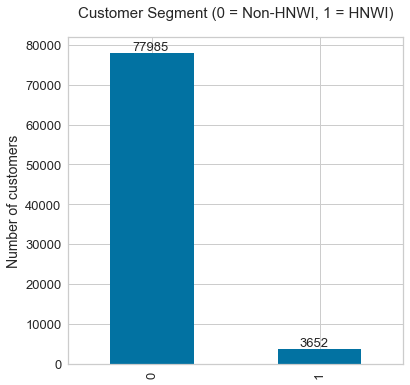

In [162]:
# imbalanced dataset
# Among 81637 customers, only 3652 (4.5%) customers are HNWI
ax = res['cust_segment'].value_counts().plot(kind='bar', figsize=(6, 6), fontsize=13)
ax.set_title('Customer Segment (0 = Non-HNWI, 1 = HNWI)', size=15, pad=20)
ax.set_ylabel('Number of customers', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.13, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=13)

In [68]:
# scale the data to range [0,1]

def norm_to_zero_one(df):
    if df.max() == df.min():
        # if max = min, then constant value for this column, no predictive value
        return 0
    return (df - df.min()) * 1.0 / (df.max() - df.min())

In [240]:
res = res.apply(norm_to_zero_one)
res.head()

,airlines_m,auto_rental_m,auto_services_m,book_store_and_stationery_m,building_and_renovation_m,business_services_m,commercial_services_m,department_stores_m,duty_free_stores_m,education_m,financial_services_m,gasoline_m,govt_pymts_m,hotels_m,hyper/supermarket_m,insurance_m,medical_m,others_m,personal_care_m,public_services_m,real_estate_and_finance_m,recreation_m,recurring_m,restaurants_m,retail_-_fashion_m,retail_-_household_m,retail_-_nec_m,road_toll_m,telecom_m,transportation_-_others_m,transportation_-_rail_m,travel_agents_m,utilities_m,airlines_f,auto_rental_f,auto_services_f,book_store_and_stationery_f,building_and_renovation_f,business_services_f,commercial_services_f,department_stores_f,duty_free_stores_f,education_f,financial_services_f,gasoline_f,govt_pymts_f,hotels_f,hyper/supermarket_f,insurance_f,medical_f,others_f,personal_care_f,public_services_f,real_estate_and_finance_f,recreation_f,recurring_f,restaurants_f,retail_-_fashion_f,retail_-_household_f,retail_-_nec_f,road_toll_f,telecom_f,transportation_-_others_f,transportation_-_rail_f,travel_agents_f,utilities_f,airlines_median,auto_rental_median,auto_services_median,book_store_and_stationery_median,building_and_renovation_median,business_services_median,commercial_services_median,department_stores_median,duty_free_stores_median,education_median,financial_services_median,gasoline_median,govt_pymts_median,hotels_median,hyper/supermarket_median,insurance_median,medical_median,others_median,personal_care_median,public_services_median,real_estate_and_finance_median,recreation_median,recurring_median,restaurants_median,retail_-_fashion_median,retail_-_household_median,retail_-_nec_median,road_toll_median,telecom_median,transportation_-_others_median,transportation_-_rail_median,travel_agents_median,utilities_median,oversea_flag_x,online_flag_x,alipay_x,tenpay_x,applepay_x,total_purchase_num,total_amt,age,pbk_ind,hib_status,occucode,gender,cntry_correspondense,intercorpacindicator,nationcode,incomelevel,marital_status,number_children,education_level,home_ownership,car_ownership,cust_segment,bussector,salary_bin,duty_free_stores,taxicabs/limousines,professional_services_-_def,book_stores,financial_inst/manual_cash,"airlines,_air_carriers",passenger_railways,films/video_production/dist,wire_transfer_money_order,mens/womens_clothing_stores,misc_personal_serv_-_def,womens_ready_to_wear_stores,hospitals,local_commuter_transport,travel_agencies,misc_specialty_retail,misc_general_merchandise,business_services_-_default,hotels/motels/resorts,fast_food_restaurants,oversea_flag_y,online_flag_y,alipay_y,tenpay_y,applepay_y
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
500999800018780,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.03,0.00,0.00,0.11,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.03,0.00,0.00,0.04,0.02,0.00,0.01,0.01,0.01,0.04,0.01,0.06,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.00,0.09,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.05,0.07,0.33,0.00,nan,0.07,1.00,0,0.00,1.00,0.33,1.00,0.00,nan,0.60,nan,0.00,0.98,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.02,0.59,0.01,0.07
500999800049891,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.03,0.01,0.00,0.00,0.01,0.00,0.03,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.01,0.01,0.00,0.04,0.10,0.02,0.00,0.00,0.01,0.00,0.05,0.04,0.03,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,

# Baseline XGB

In [122]:
## only demographic 
# left = left.set_index("customer_id")
# left = left.apply(norm_to_zero_one)
# left

In [121]:
# right3 = right.merge(right2, how = 'left', on = 'customer_id').set_index('customer_id')
# right3= right3.merge(left[['customer_id','cust_segment']], how = 'left', on = 'customer_id').set_index('customer_id')
# right3 = right3.apply(norm_to_zero_one)
# right3

In [5]:
# func to plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from xgboost import plot_importance
    
def XGB_baseline(X_train, X_test, y_train, y_test): 
    #train model
    xgb_model = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.1, objective = 'binary:logistic',
                             n_jobs = -1).fit(X_train, y_train)
    print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
    print('*'*60)
    print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns], y_test)))
    print('*'*60)
    y_pred = xgb_model.predict(X_test)
    y_pred_proba = xgb_model.predict_proba(X_test)[:, -1]
    print(classification_report(y_test, y_pred))
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Precision: {:.2f}'.format(tp/(tp+fp)))
    print('Recall: {:.2f}'.format(tp/(tp+fn)))
    print('F-score: {:.2f}'.format(2*tp/(2*tp+fp+fn)))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC Score:{:.2f}".format(roc_auc))
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    auc_score = auc(recall, precision)
    print('PR-AUC Score: %.3f' % auc_score)
        
#     visualization: ROC-AUC
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    plt.figure(1)
    plt.plot([0,1], [0,1],'k--')
    plt.plot(fpr, tpr, label = "ROC (area = {: .3f})".format(roc_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc = 'best')
    plt.grid(None)
    plt.show()

    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='XGBoost', color = 'orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(None)
    plt.legend()
    plt.show()
    
#     visualization: confusion matrix
    y_expected=pd.DataFrame(y_test)
    cnf_matrix=confusion_matrix(y_expected,y_pred)
    plot_confusion_matrix(cnf_matrix,classes=[0,1])
    plt.show()

#     visualization: feature importance
    fig, ax = plt.subplots(figsize=(10,50))
    plt.ylabel('ylabel', fontsize=10)
    plot_importance(xgb_model, ax)
    plt.show
    return

In [7]:
X = res.drop('cust_segment', axis=1)
y = res['cust_segment']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape)

% Positive class in Train = 4.48
% Positive class in Test  = 4.46
(61227, 146) (20410, 146) (61227,) (20410,) (81637, 146) (81637,)


Accuracy of XGB classifier on training set: 0.98
************************************************************
Accuracy of XGB classifier on test set: 0.97
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19500
           1       0.80      0.52      0.63       910

    accuracy                           0.97     20410
   macro avg       0.89      0.76      0.81     20410
weighted avg       0.97      0.97      0.97     20410

Precision: 0.80
Recall: 0.52
F-score: 0.63
ROC-AUC Score:0.98
PR-AUC Score: 0.752


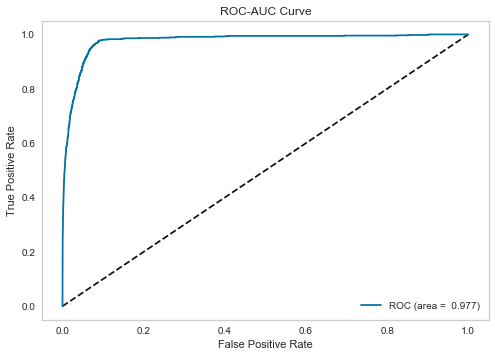

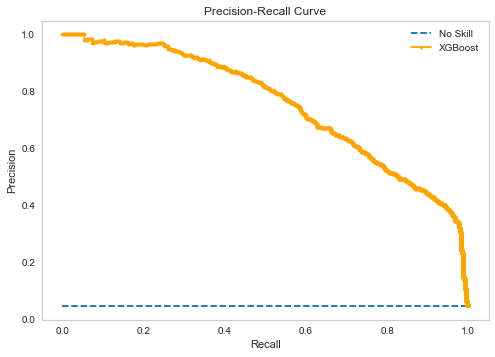

Confusion matrix, without normalization
[[19377   123]
 [  433   477]]


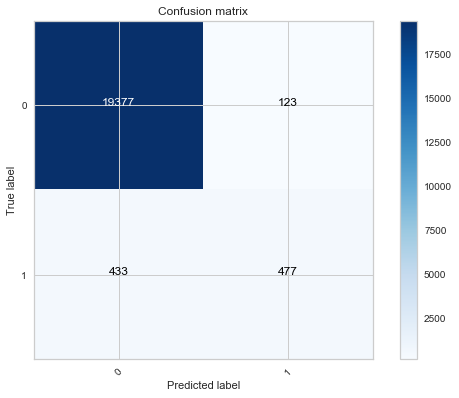

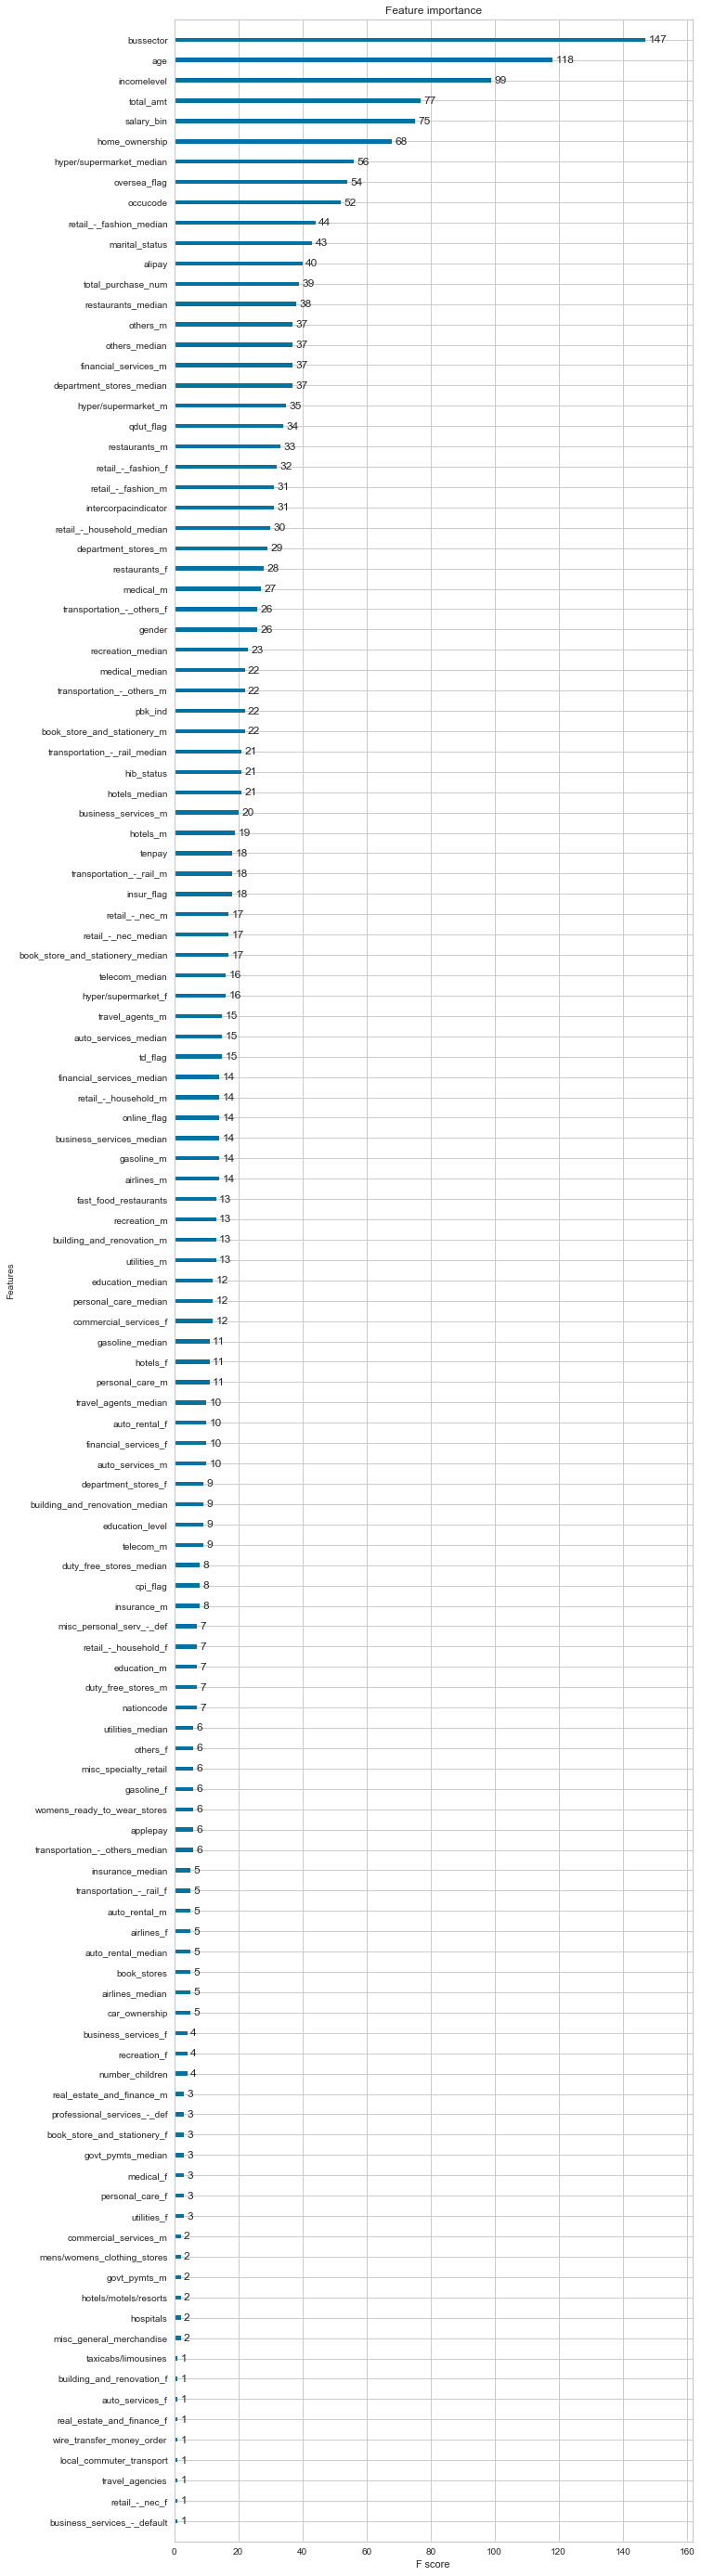

In [8]:
XGB_baseline(X_train, X_test, y_train, y_test)

# Deal with Nan & Imbalanced Dataset

In [123]:
import math

##################################################################
# try replace nan with median of the entire dataset (continuous)
#     replace nan with a new categorical variable (discrete)
#################################################################
res_t = res.copy()

# hib_status: median for both non/HNWI is 1, 67619 nan value
# replace null with 3
res_t['hib_status']= res_t.apply(lambda x: 3 if math.isnan(x.hib_status) else x.hib_status, axis=1)

# gender median = 1(man), only 3 nan value (2 non, 1 HNWI)
# replace null with 3
res_t['gender']= res_t.apply(lambda x: 3 if math.isnan(x.gender) else x.gender, axis=1)

# salary range: 1,2,3,4
# replace null with 9
res_t['salary_bin']= res_t.apply(lambda x: 9 if math.isnan(x.salary_bin) else x.salary_bin, axis=1)

# num children: median = 0 (both HNWI & non), 273 null (20 HNWI, 253 non)
# replace null with median
res_t['number_children']= res_t.apply(lambda x: 0 if math.isnan(x.number_children) else x.number_children, axis=1)

# home_ownership: 1,2,3,4,5,6
# replace null with 9
res_t['home_ownership']= res_t.apply(lambda x: 9 if math.isnan(x.home_ownership) else x.home_ownership, axis=1)

# income level: 224 nan (73 HNWI, 151 non), total median: 5 (non&HNWI median: 5); 0-9
# replace null with median-->with new category 10
res_t['incomelevel']= res_t.apply(lambda x: 10 if math.isnan(x.incomelevel) else x.incomelevel, axis=1)

# Education_Level: 4493 null (1811 HNWI & 2682 non), median = 4 (for both); 1-6
# replace null with median--> with new category 9
res_t['education_level']= res_t.apply(lambda x: 9 if math.isnan(x.education_level) else x.education_level, axis=1)

# car_ownership: 81247 null (3458 HNWI, 77789 non), median 0 (non 0, HNWI 1)
# replace null with 3
res_t['car_ownership']= res_t.apply(lambda x: 3 if math.isnan(x.car_ownership) else x.car_ownership, axis=1)

# occucode median = 3, only 1 nan value (category: HNWI) in data, median of HNWI = 2
# max = 16 replace null with 20
res_t['occucode']= res_t.apply(lambda x: 0 if math.isnan(x.occucode) else x.occucode, axis=1)

# bussector: 70400 null (107 HNWI, 70293 non), median 130 (both)
# max = 409, replace null with 500
res_t['bussector']= res_t.apply(lambda x: 0 if math.isnan(x.bussector) else x.bussector, axis=1)

In [124]:
res_t.head()

,airlines_m,auto_rental_m,auto_services_m,book_store_and_stationery_m,building_and_renovation_m,business_services_m,commercial_services_m,department_stores_m,duty_free_stores_m,education_m,...,misc_specialty_retail,misc_general_merchandise,business_services_-_default,hotels/motels/resorts,fast_food_restaurants,oversea_flag_y,online_flag_y,alipay_y,tenpay_y,applepay_y
customer_id,,,,,,,,,,,,,,,,,,,,,
500999800018780,0.0,210.61,183.94,0.00,204.10,719.06,0.0,243879.34,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.000000,0.021277,0.585106,0.010638,0.074468
500999800049891,0.0,0.00,13670.93,0.00,112431.12,0.00,0.0,3837.08,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.558974,0.000000,0.000000
500999800069356,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.000000,0.000000
500999800069458,7661.6,0.00,0.00,58.69,0.00,0.00,0.0,781.86,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.047619,0.095238,0.000000,0.333333,0.095238
500999800069727,3862.2,1591.67,0.00,931.58,3692.64,4017.77,0.0,386.28,0.0,4898.4,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.055944,0.869930,0.000000,0.000000


Accuracy of XGB classifier on training set: 0.98
************************************************************
Accuracy of XGB classifier on test set: 0.97
************************************************************
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     19500
         1.0       0.77      0.52      0.62       910

    accuracy                           0.97     20410
   macro avg       0.87      0.75      0.80     20410
weighted avg       0.97      0.97      0.97     20410

Precision: 0.77
Recall: 0.52
F-score: 0.62
ROC-AUC Score:0.98
PR-AUC Score: 0.738


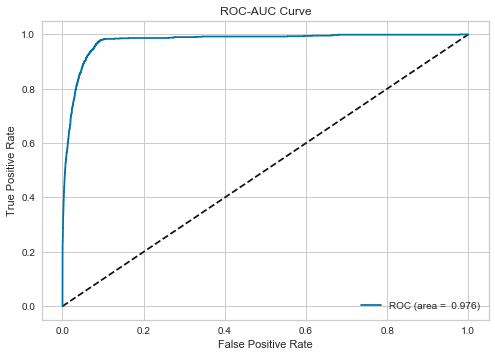

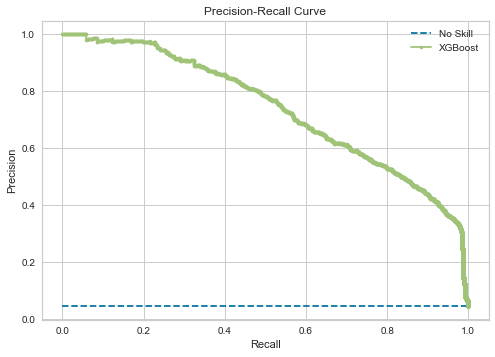

Confusion matrix, without normalization
[[19358   142]
 [  440   470]]


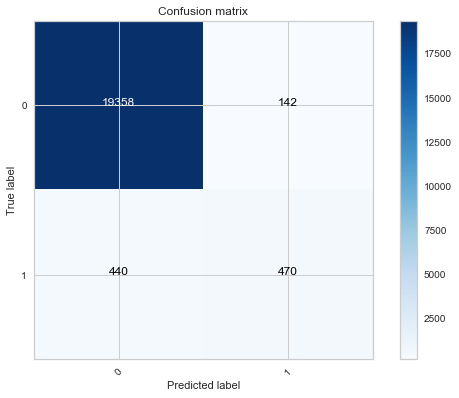

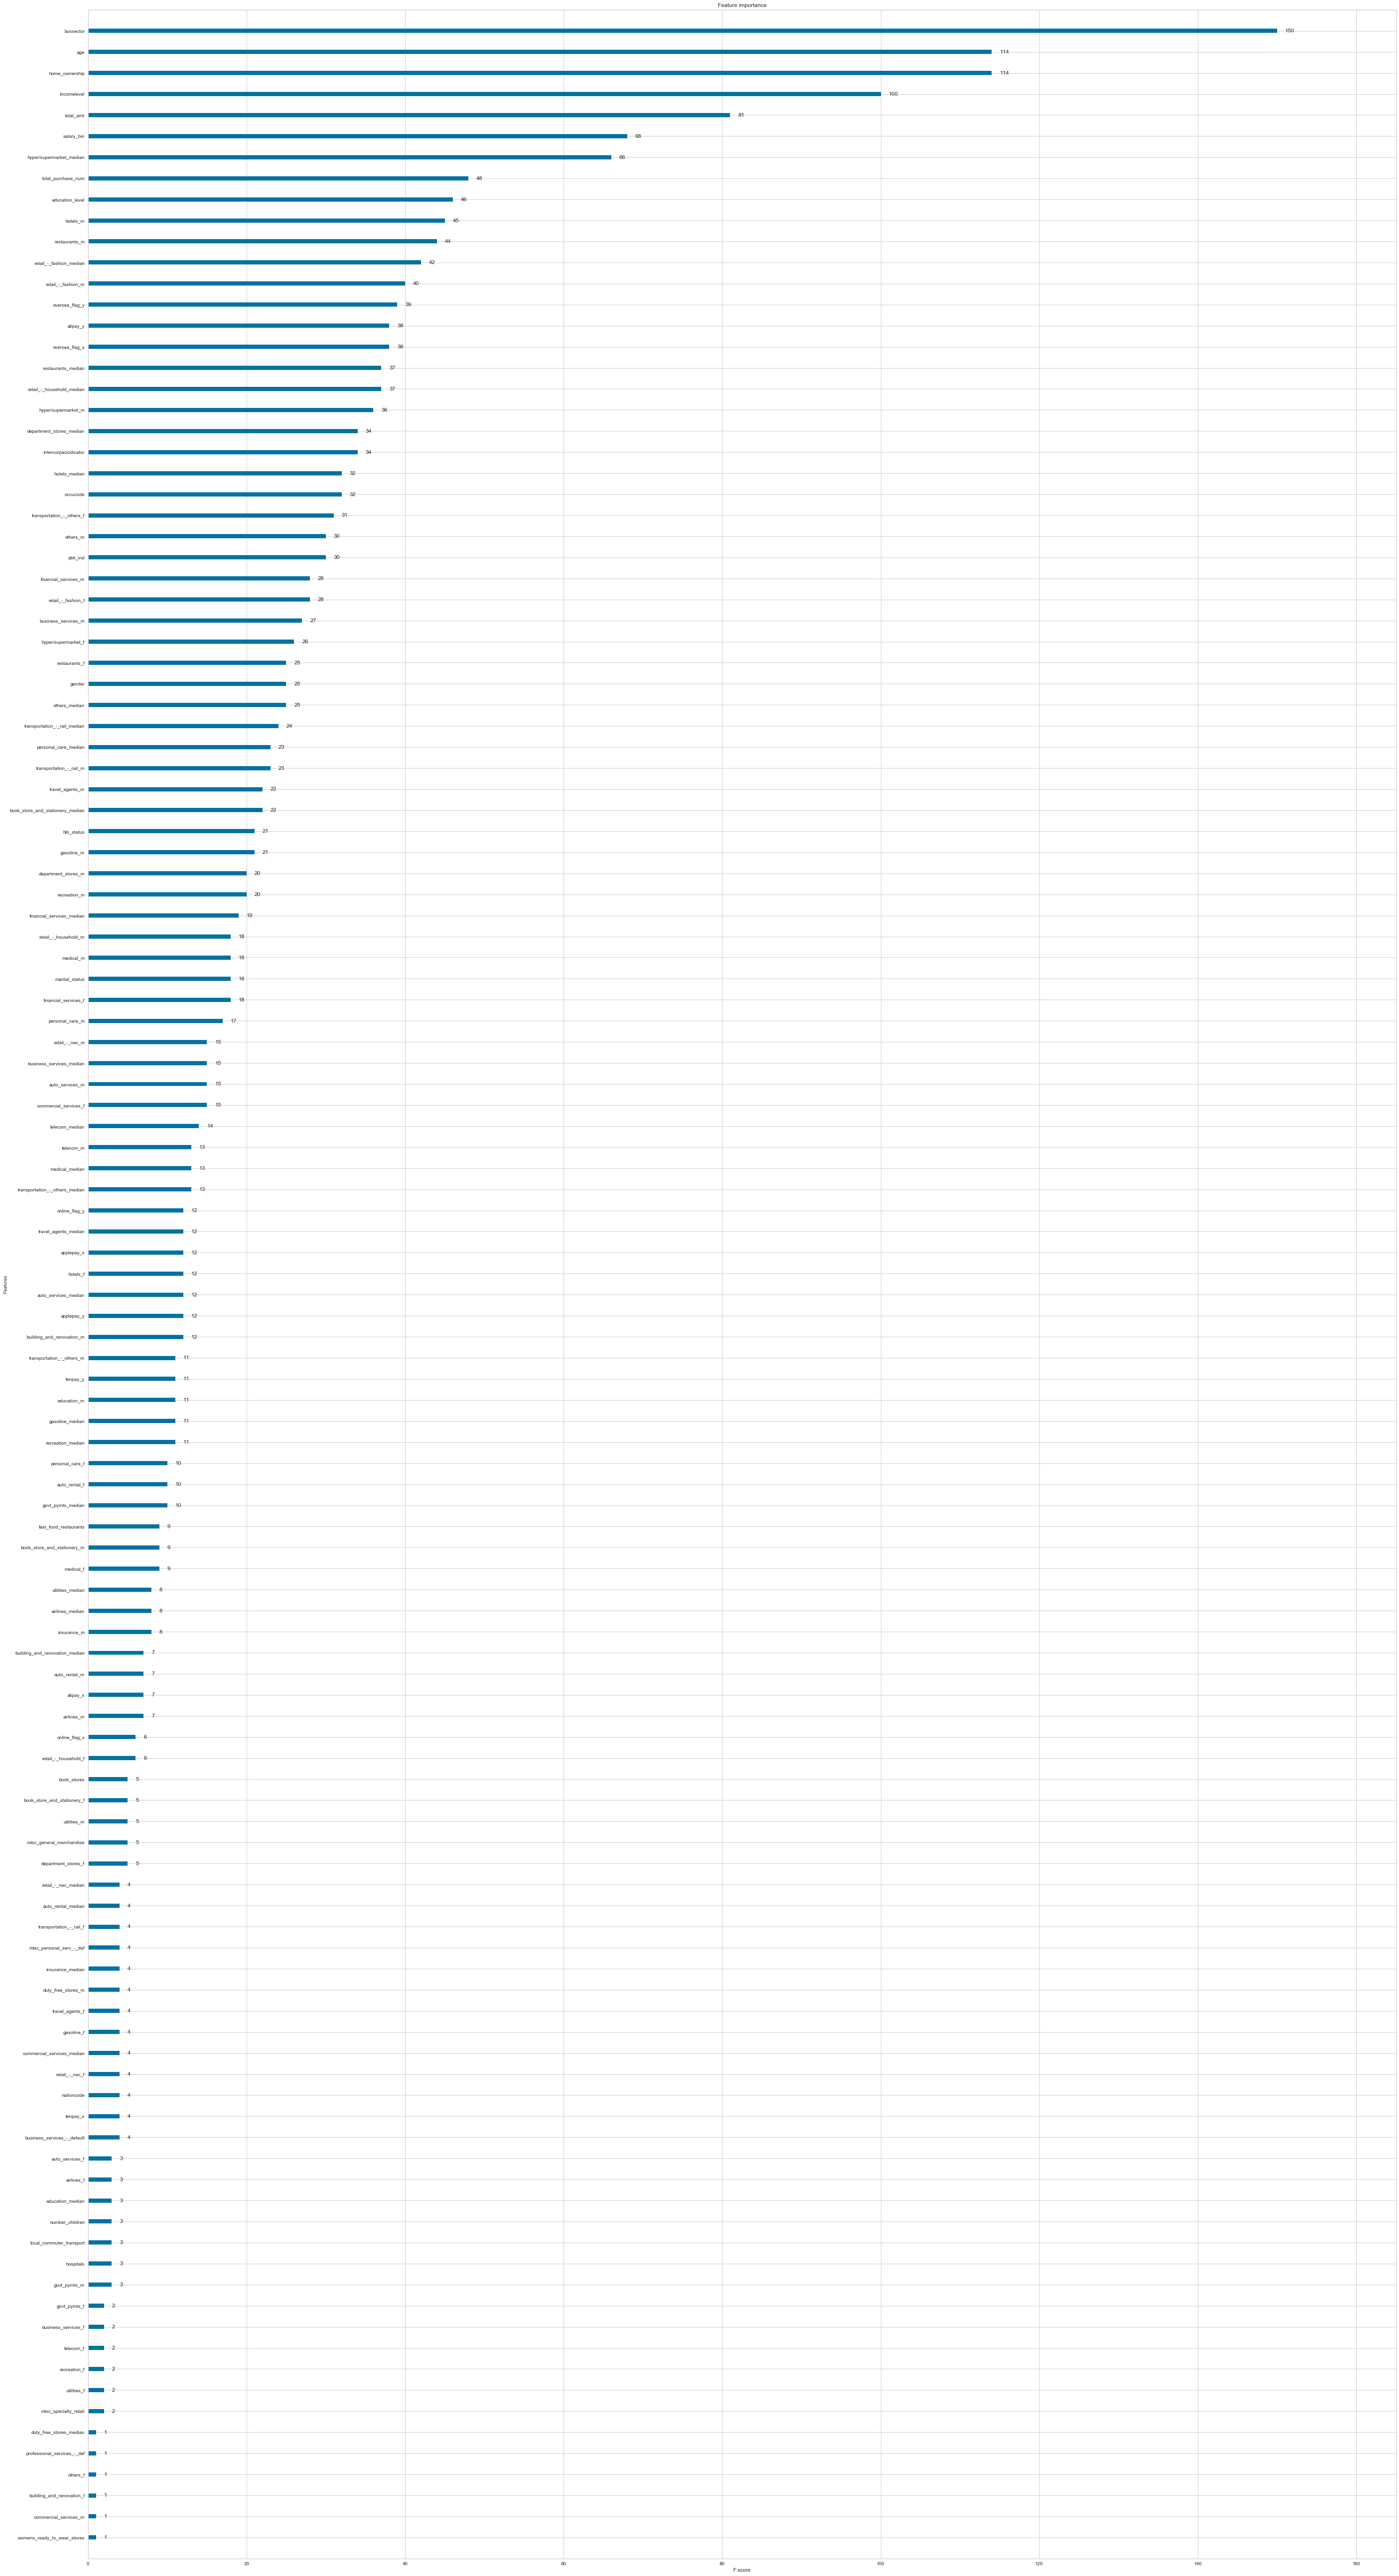

In [125]:
res_t1 = res_t.apply(norm_to_zero_one)

X_m = res_t1.drop('cust_segment', axis=1)
y_m = res_t1['cust_segment']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.25, random_state=42)

XGB_baseline(X_train_m, X_test_m, y_train_m, y_test_m)

In [281]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2',solver='saga',max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_m = logreg.predict(X_test)
y_pred_m_proba = logreg.predict_proba(X_test)[:, -1]
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_m).ravel()
print('Precision: {:.2f}'.format(tp/(tp+fp)))
print('Recall: {:.2f}'.format(tp/(tp+fn)))
print('F-score: {:.2f}'.format(2*tp/(2*tp+fp+fn)))

print("ROC-AUC Score:{:.2f}".format(roc_auc_score(y_test, y_pred_m_proba)))


precision_lg, recall_lg, _ = precision_recall_curve(y_test, y_pred_m_proba)
auc_score_lg = auc(recall_lg, precision_lg)
print('PR-AUC Score: %.3f' % auc_score_lg)

Accuracy of logistic regression classifier on test set: 0.95
Precision: 0.12
Recall: 0.01
F-score: 0.01
ROC-AUC Score:0.53
PR-AUC Score: 0.048


In [54]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = XGBClassifier(max_depth = 5, learning_rate = 0.1, objective = 'binary:logistic',
                             n_jobs = -1)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf4], 
                          meta_classifier=lr)

X_stack = res_t1.drop('cust_segment', axis=1)
y_stack = res_t1['cust_segment']

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf4, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'XGboost',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_stack, y_stack, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.95 (+/- 0.02) [KNN]
Accuracy: 0.96 (+/- 0.00) [Random Forest]
Accuracy: 0.96 (+/- 0.01) [XGboost]
Accuracy: 0.96 (+/- 0.01) [StackingClassifier]


In [174]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

estimators = [('lr', LogisticRegression(penalty='l2',solver='saga',max_iter=10000)),
              ('xgb', XGBClassifier(max_depth = 5, learning_rate = 0.1, objective = 'binary:logistic',
                             n_jobs = -1))]

reg = StackingClassifier(estimators=estimators,
                        final_estimator=LogisticRegression())
print("Stacked Accuracy:{:.2f}".format(reg.fit(X_train_m, y_train_m).score(X_test_m, y_test_m)))

Stacked Accuracy:0.97


In [175]:
from sklearn.metrics import roc_auc_score
clf = reg.fit(X_train_m, y_train_m)
clf_pred = clf.predict(X_test_m)
print("Stacked ROC-AUC Score:{:.3f}".format(roc_auc_score(y_test_m, clf_pred)))

Stacked ROC-AUC Score:0.760


In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test_m, clf_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     19500
         1.0       0.75      0.53      0.62       910

    accuracy                           0.97     20410
   macro avg       0.86      0.76      0.80     20410
weighted avg       0.97      0.97      0.97     20410



In [177]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test_m, clf_pred)
auc_score = auc(recall, precision)
print('PR-AUC for stacked: %.3f' % auc_score)

PR-AUC for stacked: 0.649


# smote

In [277]:
####################################################
# try oversampling: SMOTE
###################################################

column_1 = list(res.drop(['cust_segment'], axis  = 1).columns)
cat_ind = []

CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    'age': res['age'].unique(),
    'incomelevel': res['incomelevel'].unique(),
    'salary_bin':res['salary_bin'].unique(),
    'pbk_ind': res['pbk_ind'].unique(),
    'hib_status': res['hib_status'].unique(), 
    'occucode': res['occucode'].unique(), 
    'gender': res['gender'].unique(),
    'cntry_correspondense':res['cntry_correspondense'].unique(), 
    'intercorpacindicator': res['intercorpacindicator'].unique(), 
    'nationcode': res['nationcode'].unique(),
    'marital_status': res['marital_status'].unique(),
    'education_level': res['education_level'].unique(),
    'car_ownership': res['car_ownership'].unique(), 
    'bussector': res['bussector'].unique() }

for i in CATEGORICAL_FEATURES_WITH_VOCABULARY:
    cat_ind.append(column_1.index(i))
cat_ind

[106, 114, 121, 107, 108, 109, 110, 111, 112, 113, 115, 117, 119, 120]

In [278]:
from imblearn.over_sampling import SMOTENC 
sm = SMOTENC(categorical_features = cat_ind, random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X_train before SMOTE: {X_train.shape}
          Shape of X_train after SMOTE: {X_train_sm.shape}''')

print('\nBalance of positive and negative classes in training set(%):')
print(y_train_sm.value_counts(normalize=True) * 100)
print()

print(f'''% Positive class in Train_m = {np.round(y_train_sm.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test_m  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

Shape of X_train before SMOTE: (61227, 146)
          Shape of X_train after SMOTE: (116970, 146)

Balance of positive and negative classes in training set(%):
1   50.00
0   50.00
Name: cust_segment, dtype: float64

% Positive class in Train_m = 50.0
% Positive class in Test_m  = 4.46


Accuracy of XGB classifier on training set: 0.98
************************************************************
Accuracy of XGB classifier on test set: 0.96
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     19500
           1       0.54      0.68      0.60       910

    accuracy                           0.96     20410
   macro avg       0.76      0.83      0.79     20410
weighted avg       0.97      0.96      0.96     20410

Precision: 0.54
Recall: 0.68
F-score: 0.60
ROC-AUC Score:0.97
PR-AUC Score: 0.706


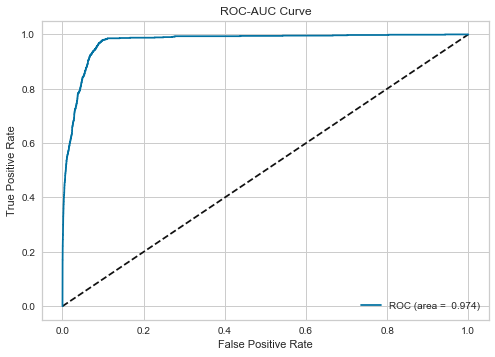

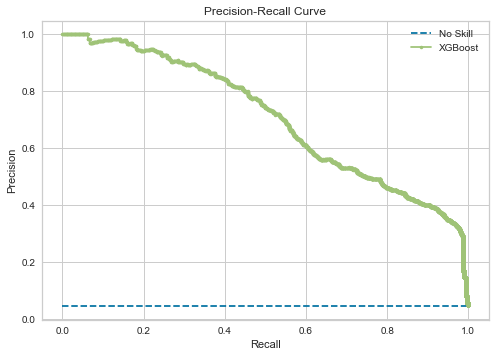

Confusion matrix, without normalization
[[18975   525]
 [  290   620]]


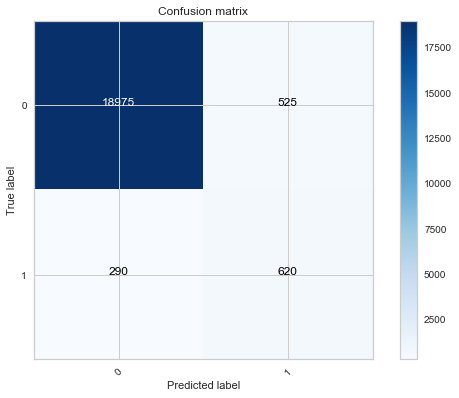

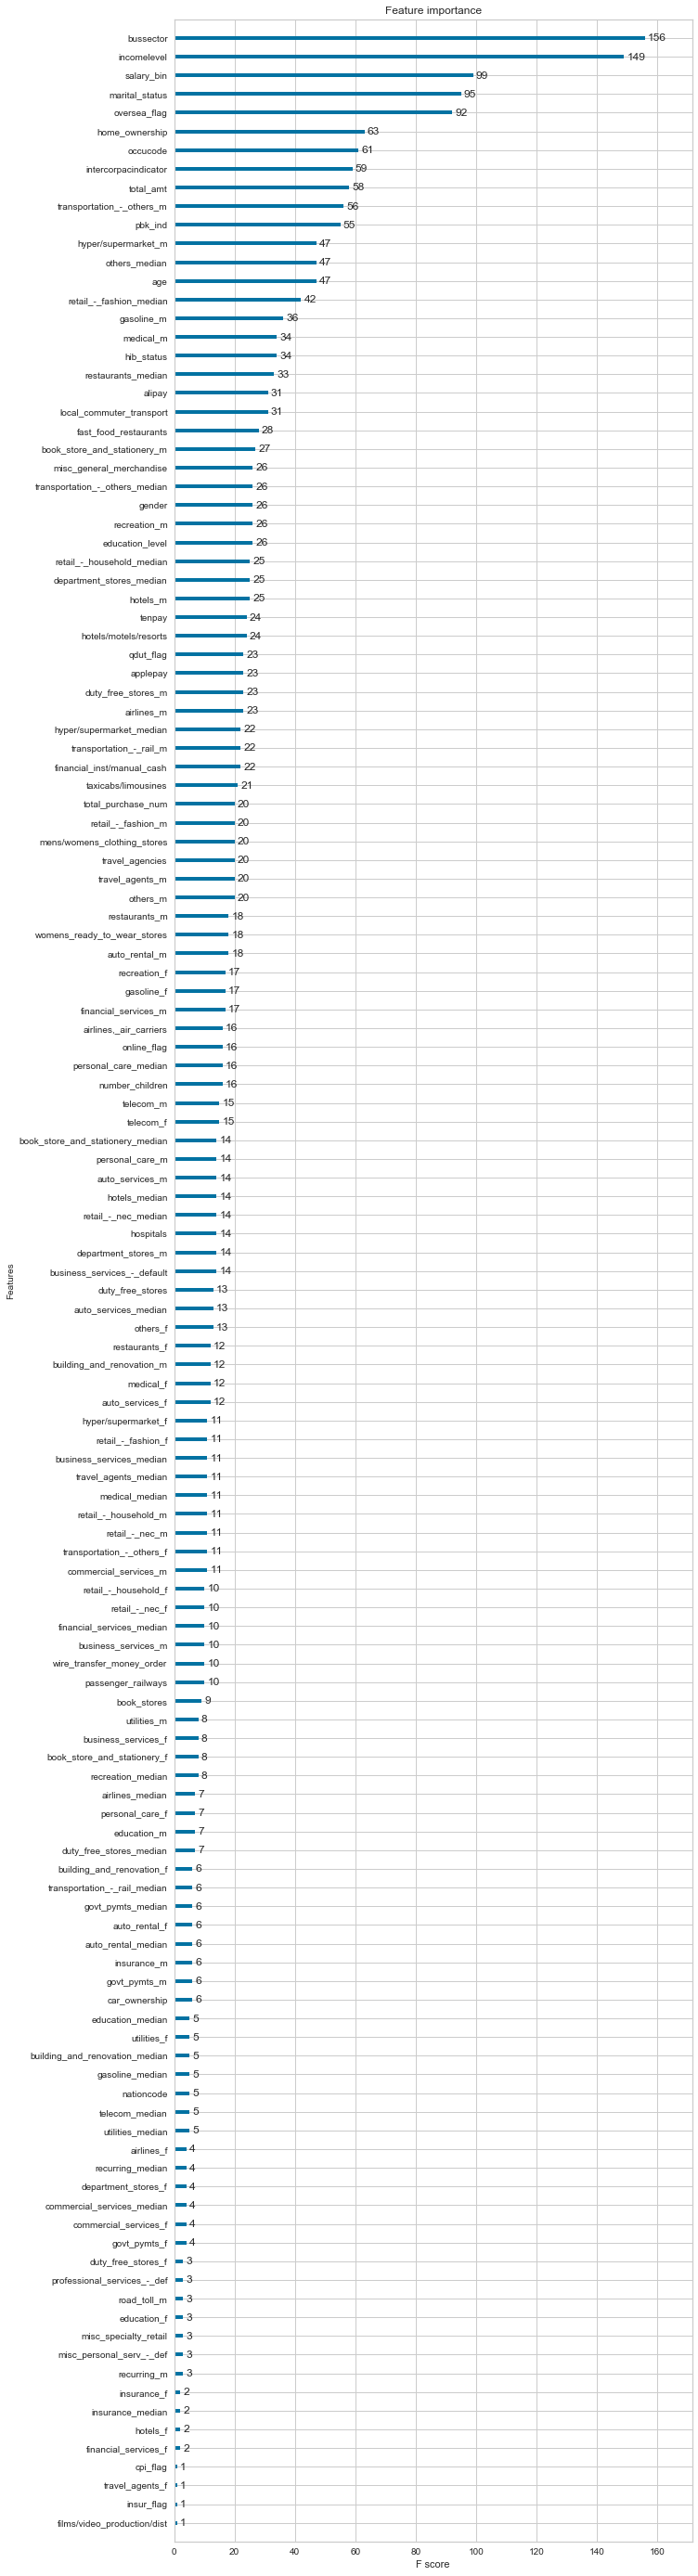

In [279]:
XGB_baseline(X_train_sm, X_test, y_train_sm, y_test)

In [180]:
from sklearn.metrics import roc_auc_score
clf_sm = reg.fit(X_train_sm, y_train_sm)
clf_pred_sm = clf_sm.predict(X_test_m)
print(classification_report(y_test_m, clf_pred))
print("ROC-AOC Score:{:.2f}".format(roc_auc_score(y_test_m, clf_pred_sm)))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     19500
         1.0       0.75      0.53      0.62       910

    accuracy                           0.97     20410
   macro avg       0.86      0.76      0.80     20410
weighted avg       0.97      0.97      0.97     20410

ROC-AOC Score:0.85


In [182]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test_m, clf_pred_sm)
auc_score = auc(recall, precision)
print('PR-AUC for stacked (smote): %.3f' % auc_score)

PR-AUC for stacked (smote): 0.653


In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_m, clf_pred_sm)

array([[18998,   502],
       [  250,   660]])

# financial product

In [75]:
#browing summary: total 2926587, unique 116455
# remove date, channel 1 freq, channel 2 freq...product type1 freq, pagetype1 freq/view num/time;
# pagetype 2 freq/view num/time
isst_col = get_col(118,124)
isst_data = pd.read_csv('NYU_ISST_Summary.txt', sep="|", encoding= 'unicode_escape', header = None,
                       names = isst_col)
isst_data.head()

,eventdate,channel,customer_id,producttype,pagetype,pageviewnum,pageviewtime
0,20171216,Wechat_Baning,500999800140744,Others,Wechat_menu_click,1,0
1,20180124,Wechat_Baning,500999800876508,Credit Card,Wechat_menu_click,1,0
2,20180309,Internet_Banking,500999800614572,Others,Product_introduce,6,28015
3,20171031,Internet_Banking,500999800168011,Others,Others,1,238793
4,20180427,Wechat_Baning,500999800868780,Credit Card,Wechat_menu_click,1,0


In [82]:
isst_data['pagetype'].value_counts()

Wechat_menu_click       1621690
Others                   749438
Product_introduce        304711
Application/Order        234464
Wechat_artical_click      16284
Name: pagetype, dtype: int64

In [89]:
#insurance summary: total 2926587, unique 116455
# product code (?); max term, min term, medium term; market value-sum, max min medium; issurer (lot of missing);
#  needs1 (0/1), need 2(0/1)...
insurance1_col = get_col(83,85)
insurance1 = pd.read_csv('NYU_Insurance_Mapping.txt', sep="|", encoding= 'unicode_escape', header = None,
                       names = insurance1_col)
insurance1 = insurance1.drop(columns=['insurer'])

insurance2_col = get_col(86,90)
insurance2 = pd.read_csv('NYU_Insurance_Holding_20170630.txt', sep="|", encoding= 'unicode_escape', header = None,
                       names = insurance2_col)
insurance = insurance2.merge(insurance1, how = 'left', on = 'product_code').set_index('customer_id')
insurance.head()

,product_code,term,market_value,insurer,needs
customer_id,,,,,
500999800486549,INS00071,10,148380.01,I,Retirement
500999800233565,INS00099,10,1753430.38,A,Retirement
500999800607688,INS00099,15,56662.87,A,Retirement
500999800069781,INS00106,10,677986.26,A,NaN
500999800820134,INS00106,20,85582.52,A,NaN


In [100]:
#cpi summary: total 25806, unique 18210
# product class(all cpi); drop account_id; drop account opendate(? difference b/ product date?)
# currency, drop RCYEOD(account balance in original curr), LCYEOD (account balance)-min, max, median, sum
# MTDAVG (Month to date average account balance in RMB?); Investment currency; product end-start date
# Net Asset Value: sum, min, max, medium

cpi1_col = get_col(69,73)
cpi1 = pd.read_csv('NYU_CPI_Mapping.txt', sep="|", encoding= 'unicode_escape', header = None,
                       names = cpi1_col)
cpi2_col = get_col(74,82)
cpi2 = pd.read_csv('NYU_CPI_Holding_20170630.txt', sep="|", encoding= 'unicode_escape', header = None,
                       names = cpi2_col)
cpi = cpi2.merge(cpi1, how = 'left', on = 'product_code').set_index('customer_id')
cpi.head()

18210


,product_class,acct_id,acopendate,currency,rcyeod,lcyeod,mtdavg,product_code,investment_currency,start_date,maturity_date,nav
customer_id,,,,,,,,,,,,
500999800115834,CPI,500999800478400,20150325,CNY,628000.00,628000.00,628000.00,SP00796,CNY,20150331.0,20180404.0,0.000000
500999800713869,CPI,500999803019578,20170410,CNY,942000.00,942000.00,942000.00,SP00240,CNY,20170418.0,20190423.0,317.330598
500999800288031,CPI,500999802756645,20161012,CNY,1336091.98,1336091.98,1336091.98,SP00885,CNY,20161018.0,20181022.0,0.000000
500999800703332,CPI,500999803003007,20170327,CNY,1570000.00,1570000.00,1570000.00,SP00227,CNY,20170331.0,20190408.0,324.078144
500999800247477,CPI,500999803115429,20170619,AUD,62800.00,327181.72,86856.48,SP00298,AUD,20170623.0,20190628.0,320.696364


In [113]:
cpi1[cpi1['product_code'] == 'SP00289']
cpi1.head()

,product_code,investment_currency,start_date,maturity_date,nav
0,SP01076,CNY,20151231,20180108,0.000000
1,SP00289,CNY,20170630,20190708,334.453646
2,SP01262,CNY,20170516,20190521,314.952676
3,SP00773,CNY,20170515,20171120,0.000000
4,SP00456,CNY,20171130,20191205,297.527560


# Miscancellous

In [40]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar", "foo"], "rval": [4, 5, 6], 'extra': [7,8,9]})
print(left)
print()
print(right)
pd.merge(left, right, on="key")
# spending= spending.merge(cust_data[['customer_id','cust_segment']], how = 'left', on = 'customer_id').set_index('customer_id')
right=right.merge(left, how = 'left', on = 'key').set_index('key')
print()
print(right)

   key  lval
0  foo     1
1  bar     2

   extra  key  rval
0      7  foo     4
1      8  bar     5
2      9  foo     6

     extra  rval  lval
key                   
foo      7     4     1
bar      8     5     2
foo      9     6     1


In [10]:
a = '3.installment'
int(a.split(".")[0])

3

In [5]:
import numpy as np
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df = df.drop(columns=['B', 'C'])
print(df)

   A   D
0  0   3
1  4   7
2  8  11


In [6]:
df['A'] = df['A'].apply(lambda x: x+3)

In [9]:
right = pd.DataFrame({"key": ["foo.", "bar", "foo"], "rval": [4, 5, 6]})
right

,key,rval
0,foo,4
1,bar,5
2,foo,6


In [ ]:
# loading DDTNJNP - Transaction history of current account from 201707 to 201806 data 
# [32,80121 rows x 8 columns] ; 100981 unique

ddt_col = get_col(24,31)
ddt_data = pd.read_csv('NYU_DDTNJNP.txt', sep="|",encoding="unicode_escape", header = None,
                         names = ddt_col)
# print (ddt_data)
print(ddt_data['customer_id'].nunique())

In [ ]:
# if interested, outliers can be determined 
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

In [37]:
import sys
print(sys.version)

3.6.13 |Anaconda custom (64-bit)| (default, Feb 23 2021, 12:58:59) 
[GCC Clang 10.0.0 ]


In [216]:
df = pd.DataFrame({"A": ['a', 'b', 'c'], "B": [4, 5, 6]})
df

,A,B
0,a,4
1,b,5
2,c,6


In [220]:
df.set_axis(df['A'].values, axis='index')

/Users/estheryao/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """Entry point for launching an IPython kernel.


In [221]:
df

,A,B
a,a,4
b,b,5
c,c,6


In [223]:
df.to_csv('file_name.csv', index=False)

In [36]:
import sklearn
sklearn.__version__

'0.24.1'

In [275]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 7.2 MB 823 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# # Train
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)
# preds = model.predict(X_test)

# # Evaluate
# print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
# cm = confusion_matrix(y_test, preds)
# plt.figure(figsize=(8, 6))
# plt.title('Confusion Matrix (without SMOTE)', size=16)
# sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
# # Generate and plot a synthetic imbalanced classification dataset
# from collections import Counter
# from sklearn.datasets import make_classification
# from matplotlib import pyplot
# from numpy import where
# # define dataset
# # X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# #                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# # # summarize class distribution
# # counter = Counter(y)
# # print(counter)
# # scatter plot of examples by class label
# for label, _ in counter.items():
#     row_ix = where(y == label)[0]
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()

In [33]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
import xgboost as xgb
 
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
#     level0.append(('cart', DecisionTreeClassifier()))
#     level0.append(('svm', SVC()))
#     level0.append(('bayes', GaussianNB()))
    level0.append(('xgboost', xgb.XGBClassifier(max_depth = 5, learning_rate = 0.1, objective = 'binary:logistic',
                             n_jobs = -1)))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
#     models['cart'] = DecisionTreeClassifier()
#     models['svm'] = SVC()
#     models['bayes'] = GaussianNB()
    models['xgboost'] = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.1, objective = 'binary:logistic',
                             n_jobs = -1)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X_stack = res_t1.drop('cust_segment', axis=1)
y_stack = res_t1['cust_segment']
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_stack, y_stack)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

In [282]:
a = 'dse'
a.index('k')

ValueError: substring not found

In [ ]:
mcg_description： by hnwi/non-hnwi 按total freq/人数，比较 top 10 category 挑出两个不同项。